# 0. 환경설정

## 0.0) Colab 사용 시 실행: 글꼴 설정 및 드라이브 마운트  
코랩 환경 미사용 시 실행하지 마세요.

In [ ]:
# 한글 글꼴 설치, 이 셀 실행 후 런타임 다시 시작 / matplotlib 미활용시 실행 X
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [ ]:
#드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 0.1) 라이브러리 설치, 임포트 및 설정

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install --upgrade matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install matplotlib-inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# !pip install mplleaflet

In [ ]:
import geopandas as gpd
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import glob
import re

In [ ]:
# 데이터프레임 조회 옵션: 폭 한도 변경
pd.options.display.max_columns = 100

In [ ]:
# 글꼴 설정(한글 깨짐 방지)
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
#작업 디렉토리 설졍
working_directory = '/content/drive/MyDrive/광진구공모전' # 사용자의 작업 경로 입력
os.chdir(working_directory)

cwd = os.getcwd()

# 1. 데이터 준비 & 수합

## 1.1) 100m별 인구정보
출처: [국토정보플랫폼 국토정보맵 국토통계지도](http://map.ngii.go.kr/ms/map/NlipMap.do?tabGb=statsMap)  

### 원본데이터 불러오기

In [ ]:
DPATH_population = '/data/raw/100m격자별인구데이터'
cwd+DPATH_population
loadlist = sorted(glob.glob(cwd+DPATH_population+'/*/*.shp'))

In [ ]:
# 모든 shp 파일의 인구수가 동일한 컬럼명인 val로 되어있음. 구분의 용이함과 오류 방지를 위해 이를 다른 값으로 대치해줄 텍스트를 추출
val_names = []

pattern = re.compile(r'(?<=_인구정보-).+?(?=-\(격자\))')

for fname in loadlist:
  valname = pattern.search(fname).group(0)
  val_names.append(valname)

In [ ]:
for a,b in zip(val_names, loadlist):
  print(a,b) # 추출한 텍스트와 실제 파일 이름 순서가 일치하는지 확인

20대 인구 수(남자) /content/drive/MyDrive/광진구공모전/data/raw/100m격자별인구데이터/(B100)국토통계_인구정보-20대 인구 수(남자)-(격자) 100M_서울특별시 광진구_202210/nlsp_021001026.shp
20대 인구 수(여자) /content/drive/MyDrive/광진구공모전/data/raw/100m격자별인구데이터/(B100)국토통계_인구정보-20대 인구 수(여자)-(격자) 100M_서울특별시 광진구_202210/nlsp_021001027.shp
30대 인구 수(남자) /content/drive/MyDrive/광진구공모전/data/raw/100m격자별인구데이터/(B100)국토통계_인구정보-30대 인구 수(남자)-(격자) 100M_서울특별시 광진구_202210/nlsp_021001029.shp
30대 인구 수(여자) /content/drive/MyDrive/광진구공모전/data/raw/100m격자별인구데이터/(B100)국토통계_인구정보-30대 인구 수(여자)-(격자) 100M_서울특별시 광진구_202210/nlsp_021001030.shp
40대 인구 수(남자) /content/drive/MyDrive/광진구공모전/data/raw/100m격자별인구데이터/(B100)국토통계_인구정보-40대 인구 수(남자)-(격자) 100M_서울특별시 광진구_202210/nlsp_021001032.shp
40대 인구 수(여자) /content/drive

In [ ]:
#val_names 에서 괄호 빼고, 공란은 언더바로 변경
new_val_names = []
for colname in val_names:
  new_val_names.append(colname.replace('(', '_').replace(')', '').replace(' ', ''))

In [ ]:
new_val_names

['20대인구수_남자',
 '20대인구수_여자',
 '30대인구수_남자',
 '30대인구수_여자',
 '40대인구수_남자',
 '40대인구수_여자',
 '50대인구수_남자',
 '50대인구수_여자',
 '60대인구수_남자',
 '60대인구수_여자',
 '70대인구수_남자',
 '70대인구수_여자',
 '고령인구수_남자',
 '고령인구수_여자',
 '생산가능인구수_남자',
 '생산가능인구수_여자',
 '총인구수_전체']

In [ ]:
# 경로의 파일 모두 불러오기
gdfs = [gpd.read_file(route, encoding = 'utf-8') for route in loadlist]

In [ ]:
# 불러온 파일 확인
gdfs[0].head(3)

,gid,lbl,val,geometry
0,다사628508,N/A,0.0,"POLYGON ((962800.000 1950800.000, 962800.000 1..."
1,다사636494,25.00,25.0,"POLYGON ((963600.000 1949400.000, 963600.000 1..."
2,다사630485,33.00,33.0,"POLYGON ((963000.000 1948500.000, 963000.000 1..."


### 기초 전처리: 컬럼명 변경, 결측치 제거
- 모든 데이터프레임의 인구수 컬럼명이 'val'로 되어있는데, 그대로 merge시 어떤 인구수인지 구분할 수 없으므로 컬럼명 변경 필요
- 어린이 대공원, 한강 인근 영역 등 거주인원 0명인 곳의 값이 결측치가 되어있는데 0으로 바꿔줄 필요 있음.

In [ ]:
for i in range(len(gdfs)):
  gdfs[i].rename({'val':new_val_names[i]}, axis=1, inplace = True)

In [ ]:
gdfs[0].head(3)

,gid,lbl,20대인구수_남자,geometry
0,다사628508,N/A,0.0,"POLYGON ((962800.000 1950800.000, 962800.000 1..."
1,다사636494,25.00,25.0,"POLYGON ((963600.000 1949400.000, 963600.000 1..."
2,다사630485,33.00,33.0,"POLYGON ((963000.000 1948500.000, 963000.000 1..."


In [ ]:
all_population = gdfs[0][['20대인구수_남자','geometry']] # 첫 geodataframe에 리스트의 첫 요소 넣기

for i in range(len(gdfs))[1:]: # all_population에 다음 요소들을 merge하여 데이터 병합
  all_population = all_population.merge(gdfs[i][[new_val_names[i], 'geometry']], left_on = 'geometry', right_on = 'geometry')

In [ ]:
all_population.fillna(0, inplace = True) # 0은 결측치가 아닌 인구가 없는 지역이므로 0으로 채우기

In [ ]:
all_population # 생산가능인구수는 만 15세 ~ 만 65세로, 2/3/4/5/60대 인구 수의 총합과 일치하지 않음. / 어린이대공원, 한강 최근접 영역 등 거주인원이 0명인 영역 다수 존재

,20대인구수_남자,geometry,20대인구수_여자,30대인구수_남자,30대인구수_여자,40대인구수_남자,40대인구수_여자,50대인구수_남자,50대인구수_여자,60대인구수_남자,60대인구수_여자,70대인구수_남자,70대인구수_여자,고령인구수_남자,고령인구수_여자,생산가능인구수_남자,생산가능인구수_여자,총인구수_전체
0,0.0,"POLYGON ((962800.000 1950800.000, 962800.000 1...",0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,21.0,45.0
1,25.0,"POLYGON ((963600.000 1949400.000, 963600.000 1...",42.0,45.0,38.0,43.0,28.0,40.0,39.0,29.0,34.0,19.0,32.0,34.0,58.0,175.0,173.0,469.0
2,33.0,"POLYGON ((963000.000 1948500.000, 963000.000 1...",40.0,40.0,41.0,17.0,24.0,30.0,36.0,30.0,36.0,13.0,25.0,38.0,64.0,136.0,159.0,412.0
3,31.0,"POLYGON ((962600.000 1947900.000, 962600.000 1...",22.0,37.0,36.0,23.0,24.0,29.0,33.0,27.0,32.0,12.0,15.0,36.0,35.0,133.0,139.0,367.0
4,31.0,"POLYGON ((963100.000 1952200.000, 963100.000 1...",27.0,44.0,41.0,27.0,28.0,29.0,29.0,29.0,25.0,14.0,16.0,32.0,34.0,148.0,140.0,385.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1807,0.0,"POLYGON ((963600.000 1948700.000, 963600.000 1...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1808,0.0,"POLYGON ((964400.000 1952600.000, 964400.000 1...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1809,0.0,"POLYGON ((962400.000 1950100.000, 962400.000 1...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1810,0.0,"POLYGON ((961300.000 1947900.000, 961300.000 1...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
cwd

'/content/drive/MyDrive/광진구공모전'

In [ ]:
DPATH_save_population = cwd+'/data/processed/집단별_100m격자별인구정보/'
# os.mkdir(DPATH_save_population)

In [ ]:
all_population['geometry_origin'] = all_population['geometry']
all_population['geometry'] = all_population['geometry_origin'].centroid


In [ ]:
all_population.to_csv(DPATH_save_population+'집단별_100m격자별인구정보.csv', encoding = 'utf-8', index = False) #csv로 저장 완료

In [ ]:
all_population = all_population.to_crs('epsg:5179')

## 1.2) 법정동 경계  
위의 100m별 인구정보와 지역 기반으로 join하면 각 격자가 어느 법정동에 속하는지 확인 가능  
또한 지도 위에 인구정보를 함께 시각화하면, 법정동별 인구 정보를 손쉽게 확인할 수 있음.  
지도 파일 출처:[GIS 대한민국 최신 행정구역(SHP) 다운로드](http://www.gisdeveloper.co.kr/?p=2332)

In [ ]:
cwd

'/content/drive/MyDrive/광진구공모전'

In [ ]:
FPATH_map = '/data/raw/읍면동_2302/emd.shp'

In [ ]:
emd = gpd.read_file(cwd+FPATH_map, encoding = 'cp949')
gj_dong = emd[emd['EMD_CD'].str.startswith('11215')].set_crs('epsg:5179') # 광진구 법정동 코드는 11215

In [ ]:
# 인구정보와 행정동 이름+지리정보를 지리정보 기반으로 sjoin
population_gj = gpd.sjoin(all_population, gj_dong[['EMD_KOR_NM', 'geometry']], predicate='within').drop('index_right', axis=1)

In [ ]:
# 결측치 없음을 확인
population_gj.isna().sum()

20대인구수_남자           0
geometry                    0
20대인구수_여자            0
30대인구수_남자           0
30대인구수_여자            0
40대인구수_남자           0
40대인구수_여자            0
50대인구수_남자           0
50대인구수_여자            0
60대인구수_남자           0
60대인구수_여자            0
70대인구수_남자           0
70대인구수_여자            0
고령인구수_남자          0
고령인구수_여자           0
생산가능인구수_남자    0
생산가능인구수_여자     0
총인구수_전체            0
geometry_origin             0
EMD_KOR_NM                  0
dtype: int64

In [ ]:
population_gj

,20대인구수_남자,geometry,20대인구수_여자,30대인구수_남자,30대인구수_여자,40대인구수_남자,40대인구수_여자,50대인구수_남자,50대인구수_여자,60대인구수_남자,60대인구수_여자,70대인구수_남자,70대인구수_여자,고령인구수_남자,고령인구수_여자,생산가능인구수_남자,생산가능인구수_여자,총인구수_전체,geometry_origin,EMD_KOR_NM
0,0.0,POINT (962850.000 1950850.000),0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,21.0,45.0,"POLYGON ((962800.000 1950800.000, 962800.000 1...",능동
7,0.0,POINT (962750.000 1950350.000),9.0,10.0,0.0,9.0,7.0,9.0,10.0,0.0,9.0,0.0,7.0,9.0,11.0,35.0,40.0,97.0,"POLYGON ((962700.000 1950300.000, 962700.000 1...",능동
24,14.0,POINT (962750.000 1950650.000),18.0,0.0,22.0,13.0,11.0,13.0,10.0,11.0,15.0,10.0,9.0,20.0,22.0,54.0,69.0,172.0,"POLYGON ((962700.000 1950600.000, 962700.000 1...",능동
26,58.0,POINT (962850.000 1950650.000),64.0,59.0,78.0,25.0,41.0,26.0,41.0,31.0,36.0,10.0,24.0,37.0,55.0,191.0,249.0,556.0,"POLYGON ((962800.000 1950600.000, 962800.000 1...",능동
40,0.0,POINT (963650.000 1950250.000),15.0,9.0,17.0,10.0,0.0,0.0,13.0,6.0,0.0,0.0,0.0,0.0,0.0,31.0,53.0,90.0,"POLYGON ((963600.000 1950200.000, 963600.000 1...",능동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1703,0.0,POINT (962950.000 1949250.000),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((962900.000 1949200.000, 962900.000 1...",화양동
1730,0.0,POINT (962850.000 1949050.000),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((962800.000 1949000.000, 962800.000 1...",화양동
1764,0.0,POINT (962650.000 1949250.000),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((962600.000 1949200.000, 962600.000 1...",화양동
1770,0.0,POINT (962650.000 1949450.000),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((962600.000 1949400.000, 962600.000 1...",화양동


In [ ]:
# 생산가능 인구 수 컬럼 추가
population_gj['생산가능인구수'] = population_gj['생산가능인구수_남자'] + population_gj['생산가능인구수_여자']

In [ ]:
population_gj.rename({'EMD_KOR_NM':'법정동'}, axis = 1, inplace = True)

In [ ]:
population_gj['법정동'].unique()

array(['능동', '구의동', '자양동', '중곡동', '광장동', '군자동', '화양동'], dtype=object)

## 1.3) 행정동 경계
출처: http://data.nsdi.go.kr/dataset/20171206ds00001

In [ ]:
admin_district = gpd.read_file('/content/drive/MyDrive/광진구공모전/data/raw/행정동경계/Z_SOP_BND_ADM_DONG_PG.shp', encoding ='cp949')

In [ ]:
dist_gj = admin_district[admin_district['ADM_DR_CD'].str.contains('11050')] #광진구 행정동 코드는 11050

In [ ]:
dist_gj.rename({'ADM_DR_NM':'행정동'}, axis = 1, inplace = True)

<ipython-input-287-42d47824edae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dist_gj.rename({'ADM_DR_NM':'행정동'}, axis = 1, inplace = True)


In [ ]:
dist_gj = dist_gj.to_crs('epsg:5179')

In [ ]:
population_gj = gpd.sjoin(population_gj, dist_gj[['행정동','geometry']], predicate='within').drop('index_right', axis=1)

In [ ]:
population_gj.rename({'geometry':'geometry_centroid',
    'geometry_origin':'geometry'
                      },axis=1,inplace= True)
population_gj = gpd.GeoDataFrame(population_gj, geometry = 'geometry')

In [ ]:
population_gj

,20대인구수_남자,geometry_centroid,20대인구수_여자,30대인구수_남자,30대인구수_여자,40대인구수_남자,40대인구수_여자,50대인구수_남자,50대인구수_여자,60대인구수_남자,60대인구수_여자,70대인구수_남자,70대인구수_여자,고령인구수_남자,고령인구수_여자,생산가능인구수_남자,생산가능인구수_여자,총인구수_전체,geometry,법정동,생산가능인구수,행정동
0,0.0,POINT (962850.000 1950850.000),0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,21.0,45.0,"POLYGON ((962800.000 1950800.000, 962800.000 1...",능동,34.0,능동
7,0.0,POINT (962750.000 1950350.000),9.0,10.0,0.0,9.0,7.0,9.0,10.0,0.0,9.0,0.0,7.0,9.0,11.0,35.0,40.0,97.0,"POLYGON ((962700.000 1950300.000, 962700.000 1...",능동,75.0,능동
24,14.0,POINT (962750.000 1950650.000),18.0,0.0,22.0,13.0,11.0,13.0,10.0,11.0,15.0,10.0,9.0,20.0,22.0,54.0,69.0,172.0,"POLYGON ((962700.000 1950600.000, 962700.000 1...",능동,123.0,능동
26,58.0,POINT (962850.000 1950650.000),64.0,59.0,78.0,25.0,41.0,26.0,41.0,31.0,36.0,10.0,24.0,37.0,55.0,191.0,249.0,556.0,"POLYGON ((962800.000 1950600.000, 962800.000 1...",능동,440.0,능동
40,0.0,POINT (963650.000 1950250.000),15.0,9.0,17.0,10.0,0.0,0.0,13.0,6.0,0.0,0.0,0.0,0.0,0.0,31.0,53.0,90.0,"POLYGON ((963600.000 1950200.000, 963600.000 1...",능동,84.0,능동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1779,0.0,POINT (964650.000 1948950.000),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((964600.000 1948900.000, 964600.000 1...",광장동,0.0,광장동
1782,0.0,POINT (965650.000 1950850.000),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((965600.000 1950800.000, 965600.000 1...",광장동,0.0,광장동
1783,0.0,POINT (964550.000 1950050.000),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((964500.000 1950000.000, 964500.000 1...",광장동,0.0,광장동
1795,0.0,POINT (964950.000 1950250.000),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((964900.000 1950200.000, 964900.000 1...",광장동,0.0,광장동


## 1.5) 구/동별 세대원 수

In [ ]:
household = pd.read_csv('/content/drive/MyDrive/광진구공모전/data/raw/★세대원수별+세대수_20230423175248.csv', encoding = 'utf-8')

In [ ]:
household.columns = household.loc[0,]

In [ ]:
household.drop(0, inplace = True)

In [ ]:
household_goo = household.drop(['동별(1)', '동별(3)'], axis = 1).copy()

household_goo.loc[:,'전체세대':].replace('-',0, inplace = True)

household_goo.loc[:,'전체세대':] = household_goo.loc[:,'전체세대':].astype(int)
household_ratio = household_goo.groupby('동별(2)').sum().sort_values(by = '1인세대', ascending = False)

<ipython-input-295-2587355720b9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  household_goo.loc[:,'전체세대':].replace('-',0, inplace = True)


In [ ]:
household_ratio['1인세대비율'] = household_ratio['1인세대']/household_ratio['전체세대']
household_new_ratio = household_ratio.sort_values(by = '1인세대비율', ascending = False).reset_index(drop = False)
household_new_ratio[['동별(2)', '1인세대비율']]

,동별(2),1인세대비율
0,관악구,0.615292
1,중구,0.521928
2,종로구,0.519552
3,금천구,0.510399
4,동대문구,0.497707
5,영등포구,0.494884
6,광진구,0.494096
7,용산구,0.491826
8,마포구,0.480220
9,동작구,0.469805


In [ ]:
household_target = household[household['동별(2)'].isin(['광진구','성동구','동대문구'])]

In [ ]:
household_target.loc[:,'전체세대':].replace('-',0, inplace = True)

<ipython-input-298-aa80732ba8c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  household_target.loc[:,'전체세대':].replace('-',0, inplace = True)


In [ ]:
household_target.loc[:,'전체세대':] = household_target.loc[:,'전체세대':].astype(int)

<ipython-input-299-729c3da379a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  household_target.loc[:,'전체세대':] = household_target.loc[:,'전체세대':].astype(int)


In [ ]:
household_target.drop(['동별(1)', '동별(2)'], axis=1)

,동별(3),전체세대,1인세대,2인세대,3인세대,4인세대,5인세대,6인세대,7인세대,8인세대,9인세대,10인세대 이상
53,소계,133305,58154,30174,23400,17060,3473,775,187,54,18,10
54,왕십리2동,7396,2978,1693,1387,1053,205,64,11,3,1,1
55,마장동,10905,5246,2363,1650,1271,270,80,11,9,2,3
56,사근동,8148,6093,967,545,425,98,11,9,0,0,0
57,행당1동,6441,2803,1389,1183,849,171,32,10,3,1,0
58,행당2동,9246,2469,2449,2188,1714,327,70,22,4,2,1
59,응봉동,5930,1586,1452,1406,1194,222,50,11,6,2,1
60,금호1가동,6533,2214,1666,1429,970,199,42,9,3,1,0
61,금호4가동,6298,2239,1652,1334,864,168,32,7,2,0,0
62,성수1가1동,7636,3284,1804,1311,993,189,44,5,6,0,0


광진구 전체 인구 수는 2023-01-30 기준으로 337416명([서울특별시_광진구_인구현황](https://www.data.go.kr/data/15052327/fileData.do) 참조)

In [ ]:
hhrange = range(1,11)
whole_housing = [83646,35216,25306,19866,4037,910,223,61,14,12]
popsum = 0
for i in range(10):
  popsum += whole_housing[i]*hhrange[i]
popsum # 그대로 인구수로 활용하면 안되고, 배수를 적용시켜야 하는 것을 확인.

337400

### 행정/법정동별 전체 인구수 중 1인 세대원 수 반영시키기

In [ ]:
household_target = household[household['동별(2)'].isin(['광진구','성동구','동대문구'])]

In [ ]:
household_target.loc[:,'전체세대':].replace('-',0, inplace = True)

<ipython-input-303-aa80732ba8c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  household_target.loc[:,'전체세대':].replace('-',0, inplace = True)


In [ ]:
household_target.loc[:,'전체세대':] = household_target.loc[:,'전체세대':].astype(int)

<ipython-input-304-729c3da379a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  household_target.loc[:,'전체세대':] = household_target.loc[:,'전체세대':].astype(int)


In [ ]:
pops = list(household_target.columns[4:].copy())[:10]
pops

['1인세대',
 '2인세대',
 '3인세대',
 '4인세대',
 '5인세대',
 '6인세대',
 '7인세대',
 '8인세대',
 '9인세대',
 '10인세대 이상']

In [ ]:
for i in range(10):
  household_target[pops[i]+'_인구수'] = household_target.loc[:,pops[i]].copy()*(i+1)

<ipython-input-306-3561fb3bf04f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  household_target[pops[i]+'_인구수'] = household_target.loc[:,pops[i]].copy()*(i+1)
<ipython-input-306-3561fb3bf04f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  household_target[pops[i]+'_인구수'] = household_target.loc[:,pops[i]].copy()*(i+1)
<ipython-input-306-3561fb3bf04f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [ ]:
household_target['인구수_전체'] = household_target.loc[:, '1인세대_인구수':].sum(axis=1)
household_target['1인세대 비율'] = household_target['1인세대_인구수']/household_target['인구수_전체']

<ipython-input-307-55f2f223060e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  household_target['인구수_전체'] = household_target.loc[:, '1인세대_인구수':].sum(axis=1)
<ipython-input-307-55f2f223060e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  household_target['1인세대 비율'] = household_target['1인세대_인구수']/household_target['인구수_전체']


In [ ]:
household_target[['동별(3)','1인세대 비율']]

,동별(3),1인세대 비율
53,소계,0.206983
54,왕십리2동,0.183081
55,마장동,0.238097
56,사근동,0.508555
57,행당1동,0.204958
58,행당2동,0.107087
59,응봉동,0.105403
60,금호1가동,0.147051
61,금호4가동,0.158817
62,성수1가1동,0.204115


In [ ]:
household_target.sort_values(by = '1인세대 비율', ascending = False)

,동별(1),동별(2),동별(3),전체세대,1인세대,2인세대,3인세대,4인세대,5인세대,6인세대,7인세대,8인세대,9인세대,10인세대 이상,1인세대_인구수,2인세대_인구수,3인세대_인구수,4인세대_인구수,5인세대_인구수,6인세대_인구수,7인세대_인구수,8인세대_인구수,9인세대_인구수,10인세대 이상_인구수,인구수_전체,1인세대 비율
72,합계,광진구,화양동,18185,14951,1972,688,445,91,28,8,0,1,1,14951,3944,2064,1780,455,168,56,0,9,10,23437.0,0.637923
56,합계,성동구,사근동,8148,6093,967,545,425,98,11,9,0,0,0,6093,1934,1635,1700,490,66,63,0,0,0,11981.0,0.508555
88,합계,동대문구,회기동,6719,4705,928,522,442,93,22,4,2,0,1,4705,1856,1566,1768,465,132,28,16,0,10,10546.0,0.446141
67,합계,성동구,용답동,7326,4939,1202,613,441,96,27,6,0,0,2,4939,2404,1839,1764,480,162,42,0,0,20,11650.0,0.423948
99,합계,동대문구,이문1동,10767,6956,1724,1039,794,192,45,11,3,3,0,6956,3448,3117,3176,960,270,77,24,27,0,18055.0,0.385267
73,합계,광진구,군자동,11400,7019,2049,1326,784,163,43,11,3,1,1,7019,4098,3978,3136,815,258,77,24,9,10,19424.0,0.361357
92,합계,동대문구,용신동,20172,12368,3674,2200,1521,319,70,17,2,1,0,12368,7348,6600,6084,1595,420,119,16,9,0,34559.0,0.357881
78,합계,광진구,능동,6406,3773,1304,722,452,113,35,6,1,0,0,3773,2608,2166,1808,565,210,42,8,0,0,11180.0,0.337478
89,합계,동대문구,휘경1동,7783,4663,1290,905,711,167,38,7,1,1,0,4663,2580,2715,2844,835,228,49,8,9,0,13931.0,0.334721
86,합계,광진구,자양4동,10209,5897,2147,1209,742,160,42,10,1,0,1,5897,4294,3627,2968,800,252,70,8,0,10,17926.0,0.328964


In [ ]:
population_gj = population_gj.merge(household_target[['동별(3)','1인세대 비율']], left_on = '행정동', right_on = '동별(3)')
population_gj['1인가구인구수(추산)'] = population_gj['총인구수_전체']*population_gj['1인세대 비율']

In [ ]:
population_gj.rename({'1인세대 비율':'1인세대 비율(행정동 기준)'}, inplace = True)

## 1.4) 100m별 공시지가

In [ ]:
landprice = gpd.read_file('/content/drive/MyDrive/광진구공모전/data/raw/(B100)국토통계_공시지가-공시지가-(격자) 100M_서울특별시 광진구_202207/nlsp_021004001.shp', encoding = 'utf-8')

In [ ]:
landprice.head()

,gid,lbl,val,geometry
0,다사629496,6024276.23,6024276.23,"POLYGON ((962900.000 1949600.000, 962900.000 1..."
1,다사636494,4615142.74,4615142.74,"POLYGON ((963600.000 1949400.000, 963600.000 1..."
2,다사631522,4987049.41,4987049.41,"POLYGON ((963100.000 1952200.000, 963100.000 1..."
3,다사633482,5880985.43,5880985.43,"POLYGON ((963300.000 1948200.000, 963300.000 1..."
4,다사633494,5325674.56,5325674.56,"POLYGON ((963300.000 1949400.000, 963300.000 1..."


In [ ]:
landprice = landprice.to_crs('epsg:5179')

In [ ]:
population_gj = gpd.sjoin(population_gj, landprice[['val', 'geometry']],  predicate='within').drop('index_right', axis=1)

<ipython-input-315-90af12085e1f>:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: PROJCS["Korea 2000 / Unified CS",GEOGCS["Korea 200 ...
Right CRS: EPSG:5179

  population_gj = gpd.sjoin(population_gj, landprice[['val', 'geometry']],  predicate='within').drop('index_right', axis=1)


In [ ]:
population_gj.rename({'val':'공시지가'}, axis =1 , inplace = True)

### 여기까지 하고, sorting 통해 땅값이 저렴하고 인구는 많은 곳을 찾아보자  
기준1. 땅값 ==> 공시지가  
기준2. 근로자 ==> 5060인구  
기준3. 잠재고객 ==> 2030 1인가구 인구

In [ ]:
# 기준 2. 근로자
population_gj['5060인구'] = population_gj[['50대인구수_남자',	'50대인구수_여자',	'60대인구수_남자'	,'60대인구수_여자']].sum(axis=1)

In [ ]:
population_gj['5060여성인구'] = population_gj[[	'50대인구수_여자',	'60대인구수_여자']].sum(axis=1)

In [ ]:
population_gj['2030인구'] =population_gj[['20대인구수_남자' ,'20대인구수_여자'	,'30대인구수_남자',	'30대인구수_여자']].sum(axis=1)

In [ ]:
population_gj['2030_1인세대(추산)'] = population_gj['2030인구']*population_gj['1인세대 비율']

In [ ]:
#경위도 따기
to_longlat = population_gj['geometry_centroid'].copy()

In [ ]:
longlat = to_longlat.to_crs('wgs84')

In [ ]:
population_gj['경도'] = longlat.geometry.x
population_gj['위도'] = longlat.geometry.y

In [ ]:
population_gj

,20대인구수_남자,geometry_centroid,20대인구수_여자,30대인구수_남자,30대인구수_여자,40대인구수_남자,40대인구수_여자,50대인구수_남자,50대인구수_여자,60대인구수_남자,60대인구수_여자,70대인구수_남자,70대인구수_여자,고령인구수_남자,고령인구수_여자,생산가능인구수_남자,생산가능인구수_여자,총인구수_전체,geometry,법정동,생산가능인구수,행정동,동별(3),1인세대 비율,1인가구인구수(추산),공시지가,5060인구,5060여성인구,2030인구,2030_1인세대(추산),경도,위도
0,0.0,POINT (962850.000 1950850.000),0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,21.0,45.0,"POLYGON ((962800.000 1950800.000, 962800.000 1...",능동,34.0,능동,능동,0.337478,15.186494,7473608.93,0.0,0.0,6.0,2.024866,127.079389,37.556250
1,0.0,POINT (962750.000 1950350.000),9.0,10.0,0.0,9.0,7.0,9.0,10.0,0.0,9.0,0.0,7.0,9.0,11.0,35.0,40.0,97.0,"POLYGON ((962700.000 1950300.000, 962700.000 1...",능동,75.0,능동,능동,0.337478,32.735331,4256442.84,28.0,19.0,19.0,6.412075,127.078282,37.551739
2,14.0,POINT (962750.000 1950650.000),18.0,0.0,22.0,13.0,11.0,13.0,10.0,11.0,15.0,10.0,9.0,20.0,22.0,54.0,69.0,172.0,"POLYGON ((962700.000 1950600.000, 962700.000 1...",능동,123.0,능동,능동,0.337478,58.046154,4241585.83,49.0,25.0,54.0,18.223792,127.078267,37.554443
3,58.0,POINT (962850.000 1950650.000),64.0,59.0,78.0,25.0,41.0,26.0,41.0,31.0,36.0,10.0,24.0,37.0,55.0,191.0,249.0,556.0,"POLYGON ((962800.000 1950600.000, 962800.000 1...",능동,440.0,능동,능동,0.337478,187.637567,4129310.92,134.0,77.0,259.0,87.406708,127.079399,37.554447
4,0.0,POINT (963650.000 1950250.000),15.0,9.0,17.0,10.0,0.0,0.0,13.0,6.0,0.0,0.0,0.0,0.0,0.0,31.0,53.0,90.0,"POLYGON ((963600.000 1950200.000, 963600.000 1...",능동,84.0,능동,능동,0.337478,30.372987,4609996.86,19.0,13.0,41.0,13.836583,127.088476,37.550874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,0.0,POINT (964650.000 1948950.000),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((964600.000 1948900.000, 964600.000 1...",광장동,0.0,광장동,광장동,0.066234,0.0,2656000.13,0.0,0.0,0.0,0.0,127.099860,37.539195
1696,0.0,POINT (965650.000 1950850.000),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((965600.000 1950800.000, 965600.000 1...",광장동,0.0,광장동,광장동,0.066234,0.0,3518249.36,0.0,0.0,0.0,0.0,127.111090,37.556359
1697,0.0,POINT (964550.000 1950050.000),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((964500.000 1950000.000, 964500.000 1...",광장동,0.0,광장동,광장동,0.066234,0.0,238175.35,0.0,0.0,0.0,0.0,127.098675,37.549106
1698,0.0,POINT (964950.000 1950250.000),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((964900.000 1950200.000, 964900.000 1...",광장동,0.0,광장동,광장동,0.066234,0.0,508498.35,0.0,0.0,0.0,0.0,127.103193,37.550924


In [ ]:
#전처리가 끝났으니 다운로드하자

In [ ]:
cwd

'/content/drive/MyDrive/광진구공모전'

In [ ]:
downpath = '/data/processed/'

In [ ]:
population_gj_csv = pd.DataFrame(population_gj)

In [ ]:
population_gj_csv.to_csv(cwd+downpath+'광진구 100m격자별 인구정보 및 공시지가(utf-8).csv', encoding = 'utf-8', index = False)

### csv 생성 끝!

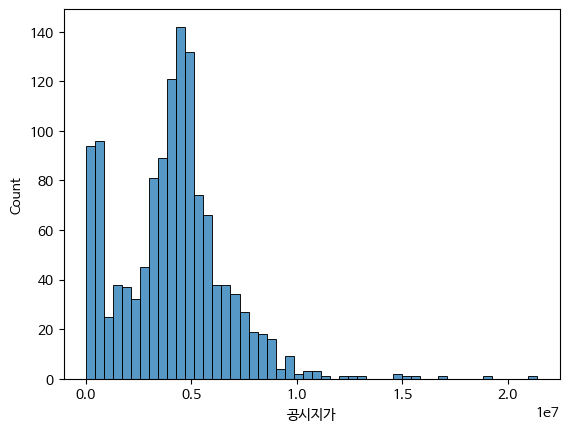

[-5000000.        0.  5000000. 10000000. 15000000. 20000000. 25000000.]


In [ ]:
import seaborn as sns
hist = sns.histplot(population_gj['공시지가'], kde=False, bins = 50)
plt.show()
print(hist.get_xticks())

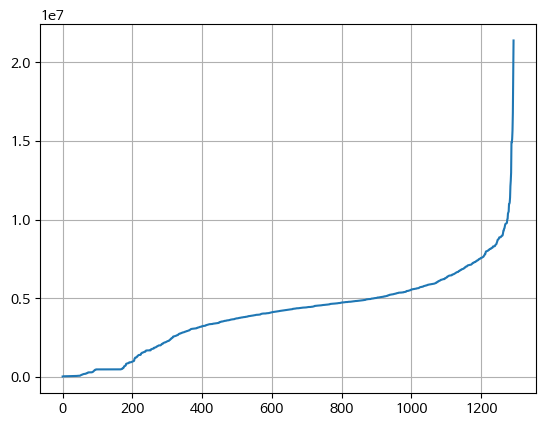

In [ ]:
plt.figure()
population_gj['공시지가'].sort_values().reset_index(drop = True).plot()
plt.grid()
plt.show()

In [ ]:
by_landprice = population_gj.sort_values(by = '공시지가', ascending = True).reset_index(drop = True).loc[250:800]

In [ ]:
by_landprice.columns

Index(['20대인구수_남자', 'geometry_centroid', '20대인구수_여자',
       '30대인구수_남자', '30대인구수_여자', '40대인구수_남자',
       '40대인구수_여자', '50대인구수_남자', '50대인구수_여자',
       '60대인구수_남자', '60대인구수_여자', '70대인구수_남자',
       '70대인구수_여자', '고령인구수_남자', '고령인구수_여자',
       '생산가능인구수_남자', '생산가능인구수_여자',
       '총인구수_전체', 'geometry', '법정동', '생산가능인구수', '행정동', '동별(3)',
       '1인세대 비율', '1인가구인구수(추산)', '공시지가', '5060인구', '5060여성인구', '2030인구',
       '2030_1인세대(추산)', '경도', '위도'],
      dtype='object')

In [ ]:
by_landprice['5060인구'] = by_landprice[['50대인구수_남자', '50대인구수_여자',
       '60대인구수_남자', '60대인구수_여자']].sum(axis=1)

In [ ]:
by_landprice.sort_values(by='5060인구', ascending = False).reset_index(drop= True)

,20대인구수_남자,geometry_centroid,20대인구수_여자,30대인구수_남자,30대인구수_여자,40대인구수_남자,40대인구수_여자,50대인구수_남자,50대인구수_여자,60대인구수_남자,60대인구수_여자,70대인구수_남자,70대인구수_여자,고령인구수_남자,고령인구수_여자,생산가능인구수_남자,생산가능인구수_여자,총인구수_전체,geometry,법정동,생산가능인구수,행정동,동별(3),1인세대 비율,1인가구인구수(추산),공시지가,5060인구,5060여성인구,2030인구,2030_1인세대(추산),경도,위도
0,67.0,POINT (964450.000 1948950.000),52.0,44.0,58.0,63.0,86.0,85.0,85.0,66.0,75.0,33.0,26.0,79.0,90.0,321.0,336.0,925.0,"POLYGON ((964400.000 1948900.000, 964400.000 1...",구의동,657.0,구의3동,구의3동,0.152919,141.450144,3119997.27,311.0,160.0,221.0,33.795115,127.097596,37.539188
1,52.0,POINT (964250.000 1948950.000),51.0,30.0,37.0,45.0,52.0,80.0,88.0,46.0,53.0,24.0,14.0,53.0,47.0,249.0,274.0,698.0,"POLYGON ((964200.000 1948900.000, 964200.000 1...",구의동,523.0,구의3동,구의3동,0.152919,106.737514,4171658.44,267.0,141.0,170.0,25.996243,127.095332,37.539180
2,46.0,POINT (962950.000 1947950.000),28.0,41.0,41.0,46.0,48.0,57.0,61.0,66.0,59.0,17.0,23.0,61.0,70.0,234.0,221.0,636.0,"POLYGON ((962900.000 1947900.000, 962900.000 1...",자양동,455.0,자양2동,자양2동,0.179487,114.153846,3771167.99,243.0,120.0,156.0,28.0,127.080668,37.530115
3,42.0,POINT (964450.000 1948650.000),29.0,33.0,42.0,41.0,50.0,53.0,66.0,54.0,56.0,28.0,38.0,83.0,84.0,206.0,234.0,668.0,"POLYGON ((964400.000 1948600.000, 964400.000 1...",구의동,440.0,구의3동,구의3동,0.152919,102.149942,2430846.31,229.0,122.0,146.0,22.326185,127.097611,37.536484
4,33.0,POINT (964250.000 1948750.000),44.0,33.0,29.0,41.0,57.0,72.0,64.0,41.0,44.0,18.0,13.0,49.0,44.0,210.0,246.0,625.0,"POLYGON ((964200.000 1948700.000, 964200.000 1...",구의동,456.0,구의3동,구의3동,0.152919,95.574421,4594969.01,221.0,108.0,139.0,21.255751,127.095342,37.537377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,0.0,POINT (964250.000 1949250.000),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((964200.000 1949200.000, 964200.000 1...",광장동,0.0,광장동,광장동,0.066234,0.0,3918640.05,0.0,0.0,0.0,0.0,127.095318,37.541884
547,0.0,POINT (962750.000 1949850.000),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((962700.000 1949800.000, 962700.000 1...",능동,0.0,능동,능동,0.337478,0.0,2097999.96,0.0,0.0,0.0,0.0,127.078308,37.547233
548,0.0,POINT (962950.000 1949750.000),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((962900.000 1949700.000, 962900.000 1...",능동,0.0,능동,능동,0.337478,0.0,2097999.74,0.0,0.0,0.0,0.0,127.080577,37.546339
549,0.0,POINT (964850.000 1949050.000),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((964800.000 1949000.000, 964800.000 1...",광장동,0.0,광장동,광장동,0.066234,0.0,4040854.13,0.0,0.0,0.0,0.0,127.102119,37.540104


In [ ]:
### 공시지가로 최적지 후보지역 찾기

In [ ]:
landnot_zero = population_gj[population_gj['공시지가'] > 0]

In [ ]:
landnot_zero['공시지가']

0       7473608.93
1       4256442.84
2       4241585.83
3       4129310.92
4       4609996.86
           ...    
1694     721652.99
1695    2656000.13
1696    3518249.36
1697     238175.35
1698     508498.35
Name: 공시지가, Length: 1294, dtype: float64

In [ ]:
dir(hist)

['ArtistList',
 '_AxesBase__clear',
 '_PROPERTIES_EXCLUDED_FROM_SET',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alias_map',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autotitlepos',
 '_axes',
 '_axes_locator',
 '_axis_map',
 '_axis_names',
 '_axisbelow',
 '_box_aspect',
 '_callbacks',
 '_check_no_units',
 '_children',
 '_clipon',
 '_clippath',
 '_cm_set',
 '_colorbars',
 '_convert_dx',
 '_current_image',
 '_default_contains',
 '_errorevery_to_mask',
 '_facecolor',
 '_fill_between_x_or_y',
 '_frameon',
 '_fully_clipped_to_axes',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spine

In [ ]:
landnot_zero['공시지가'].describe().astype('int')

count        1294
mean      4112041
std       2515173
min         23400
25%       2608148
50%       4270648
75%       5356639
max      21386493
Name: 공시지가, dtype: int64

In [ ]:
std_minus1 = landnot_zero['공시지가'].describe().astype('int')['mean']-landnot_zero['공시지가'].describe().astype('int')['std']

In [ ]:
std_minus1

1596868

In [ ]:
candi_loc = landnot_zero[landnot_zero['공시지가'] < std_minus1]

In [ ]:
candi_loc

,20대인구수_남자,geometry_centroid,20대인구수_여자,30대인구수_남자,30대인구수_여자,40대인구수_남자,40대인구수_여자,50대인구수_남자,50대인구수_여자,60대인구수_남자,60대인구수_여자,70대인구수_남자,70대인구수_여자,고령인구수_남자,고령인구수_여자,생산가능인구수_남자,생산가능인구수_여자,총인구수_전체,geometry,법정동,생산가능인구수,행정동,동별(3),1인세대 비율,1인가구인구수(추산),공시지가,5060인구,5060여성인구,2030인구,2030_1인세대(추산),경도,위도
51,0.0,POINT (963250.000 1950350.000),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((963200.000 1950300.000, 963200.000 1...",능동,0.0,능동,능동,0.337478,0.0,923999.99,0.0,0.0,0.0,0.0,127.083943,37.551759
61,0.0,POINT (963050.000 1950150.000),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((963000.000 1950100.000, 963000.000 1...",능동,0.0,능동,능동,0.337478,0.0,924000.00,0.0,0.0,0.0,0.0,127.081689,37.549949
66,0.0,POINT (963350.000 1950050.000),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((963300.000 1950000.000, 963300.000 1...",능동,0.0,능동,능동,0.337478,0.0,1493743.34,0.0,0.0,0.0,0.0,127.085090,37.549059
77,0.0,POINT (962950.000 1950350.000),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((962900.000 1950300.000, 962900.000 1...",능동,0.0,능동,능동,0.337478,0.0,924004.86,0.0,0.0,0.0,0.0,127.080547,37.551747
88,0.0,POINT (963250.000 1950250.000),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((963200.000 1950200.000, 963200.000 1...",능동,0.0,능동,능동,0.337478,0.0,924001.35,0.0,0.0,0.0,0.0,127.083948,37.550858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1689,0.0,POINT (965450.000 1950750.000),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((965400.000 1950700.000, 965400.000 1...",광장동,0.0,광장동,광장동,0.066234,0.0,1138911.12,0.0,0.0,0.0,0.0,127.108830,37.555450
1690,0.0,POINT (965450.000 1950650.000),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((965400.000 1950600.000, 965400.000 1...",광장동,0.0,광장동,광장동,0.066234,0.0,864538.47,0.0,0.0,0.0,0.0,127.108835,37.554549
1694,0.0,POINT (964850.000 1950150.000),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((964800.000 1950100.000, 964800.000 1...",광장동,0.0,광장동,광장동,0.066234,0.0,721652.99,0.0,0.0,0.0,0.0,127.102066,37.550019
1697,0.0,POINT (964550.000 1950050.000),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((964500.000 1950000.000, 964500.000 1...",광장동,0.0,광장동,광장동,0.066234,0.0,238175.35,0.0,0.0,0.0,0.0,127.098675,37.549106


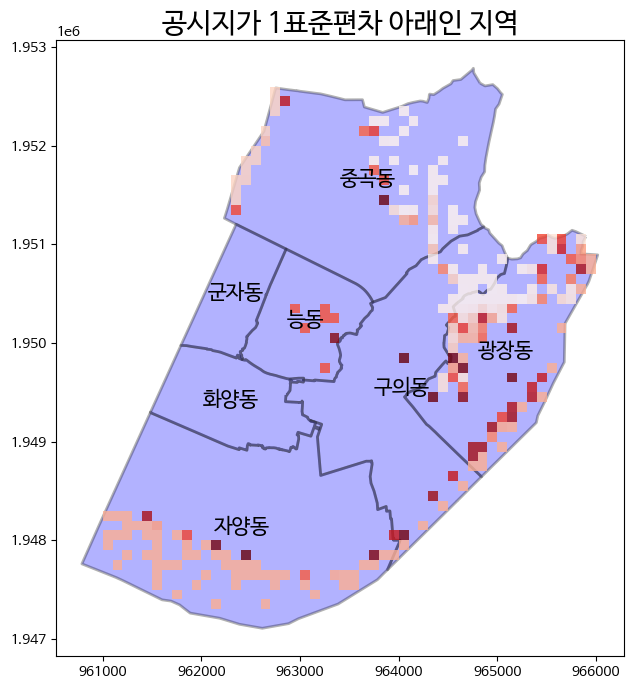

In [ ]:
# 원하는 조회 조건에 맞추어 temp에 입력
temp = candi_loc

# 광진구 법정동 경계 지도를 ax로(배경으로) 삼아 시각화 
ax = gj_dong.plot(figsize = (8,8), alpha = .3, color = 'blue')
ax.collections[0].set_linewidth(2)
ax.collections[0].set_edgecolor('black')

# 법정동명을 추가
for idx, row in gj_dong.iterrows():

    centroid = row.geometry.centroid
    ax.annotate(row['EMD_KOR_NM'], xy=(centroid.x, centroid.y),
                horizontalalignment='center', verticalalignment='center', fontsize = 15)
    
temp.plot(ax=ax, column = '공시지가', cmap = 'Reds', alpha = .8)
plt.title('공시지가 1표준편차 아래인 지역', fontsize = 20)
plt.show()

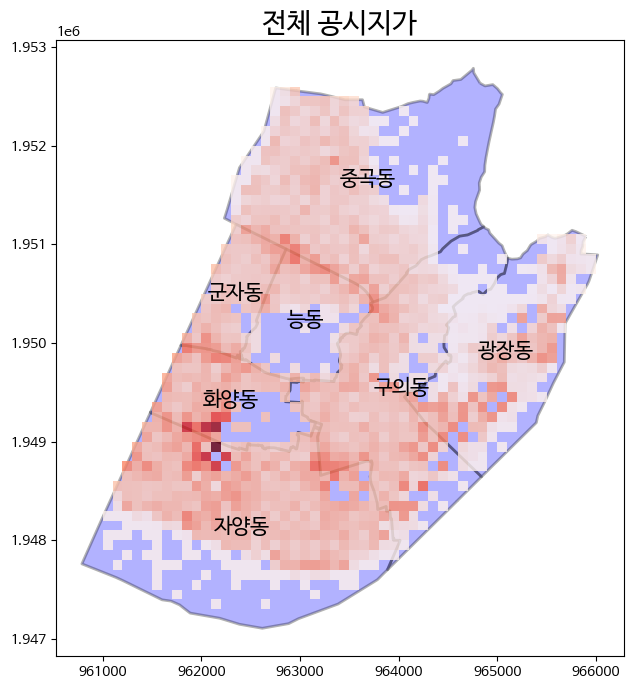

In [ ]:
# 원하는 조회 조건에 맞추어 temp에 입력
temp = population_gj

# 광진구 법정동 경계 지도를 ax로(배경으로) 삼아 시각화 
ax = gj_dong.plot(figsize = (8,8), alpha = .3, color = 'blue')
ax.collections[0].set_linewidth(2)
ax.collections[0].set_edgecolor('black')

# 법정동명을 추가
for idx, row in gj_dong.iterrows():

    centroid = row.geometry.centroid
    ax.annotate(row['EMD_KOR_NM'], xy=(centroid.x, centroid.y),
                horizontalalignment='center', verticalalignment='center', fontsize = 15)
    
temp.plot(ax=ax, column = '공시지가', cmap = 'Reds', alpha = .8)
plt.title('전체 공시지가', fontsize = 20)
plt.show()

## 1.5) (폐기) 상권 위치 정보 

In [ ]:
arcade = gpd.read_file('/content/drive/MyDrive/광진구공모전/data/raw/부동산통계정보_공실률/상권구획도/상권구획도(업로드용)/최종_상권328.shp', encoding = 'cp949')
arcade.crs

<Projected CRS: EPSG:5179>
Name: Korea 2000 / Unified CS
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Republic of Korea (South Korea) - onshore and offshore.
- bounds: (122.71, 28.6, 134.28, 40.27)
Coordinate Operation:
- name: Korea Unified Belt
- method: Transverse Mercator
Datum: Geocentric datum of Korea
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
arcade_gj = gpd.sjoin(arcade, gj_dong[['EMD_KOR_NM', 'geometry']]).drop('index_right', axis=1)

In [ ]:
arcade_gj.sort_values(by='CNAME')

,SIDOCODE,SIDONAME,CNAME,변경사항,시군명,AREA,소규모,중대형,오피스,집합상권,geometry,EMD_KOR_NM
19,11,서울,건대입구,NaN,NaN,626184,O,O,NaN,O,"POLYGON ((962076.750 1950037.375, 962104.562 1...",자양동
19,11,서울,건대입구,NaN,NaN,626184,O,O,NaN,O,"POLYGON ((962076.750 1950037.375, 962104.562 1...",화양동
19,11,서울,건대입구,NaN,NaN,626184,O,O,NaN,O,"POLYGON ((962076.750 1950037.375, 962104.562 1...",군자동
15,11,서울,구의역,신규,NaN,271904,NaN,O,NaN,NaN,"MULTIPOLYGON (((963232.117 1949182.647, 963232...",자양동
15,11,서울,구의역,신규,NaN,271904,NaN,O,NaN,NaN,"MULTIPOLYGON (((963232.117 1949182.647, 963232...",구의동
244,11,서울,군자,NaN,NaN,493321,O,O,NaN,NaN,"POLYGON ((962807.125 1951138.875, 962861.813 1...",군자동
244,11,서울,군자,NaN,NaN,493321,O,O,NaN,NaN,"POLYGON ((962807.125 1951138.875, 962861.813 1...",능동
244,11,서울,군자,NaN,NaN,493321,O,O,NaN,NaN,"POLYGON ((962807.125 1951138.875, 962861.813 1...",중곡동


In [ ]:
aracde_info = gpd.sjoin(population_gj, arcade)

<ipython-input-350-ec06cbf4b7d1>:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: PROJCS["Korea 2000 / Unified CS",GEOGCS["Korea 200 ...
Right CRS: EPSG:5179

  aracde_info = gpd.sjoin(population_gj, arcade)


In [ ]:
# # 강서구 법정동 경계 지도를 ax로(배경으로) 삼아 시각화 
# ax = gj_dong.plot(figsize = (8,8), alpha = .3, color = 'blue')
# ax.collections[0].set_linewidth(2)
# ax.collections[0].set_edgecolor('black')

# # 법정동명을 추가
# for idx, row in gj_dong.iterrows():

#     centroid = row.geometry.centroid
#     ax.annotate(row['EMD_KOR_NM'], xy=(centroid.x, centroid.y),
#                 horizontalalignment='center', verticalalignment='center', fontsize = 15)
    
# stores_gj.plot(ax=ax, cmap = 'Reds', alpha = .8)
# plt.title('광진구 주요 상권 위치', fontsize = 20)
# plt.show()

In [ ]:
# seoul_stores = stores[stores['SIDONAME']=='서울']

# stores_gj = gpd.sjoin(seoul_stores, gj_dong[['EMD_KOR_NM', 'geometry']]).drop('index_right', axis=1)

# 2. 데이터 처리: 후보지역 선별을 위한 법정동 별 공시지가 분포 점검

## 행정동별 파악

<Axes: >

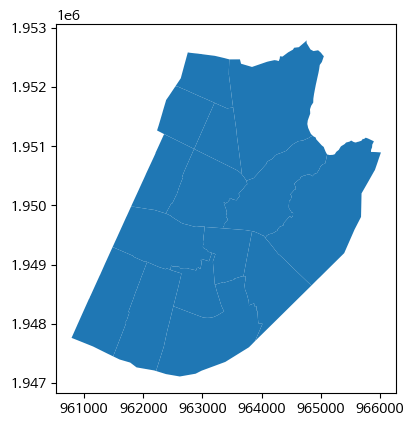

In [ ]:
dist_gj.plot()

# EDA / 시각화

## 2.0) 인구정보 지리시각화

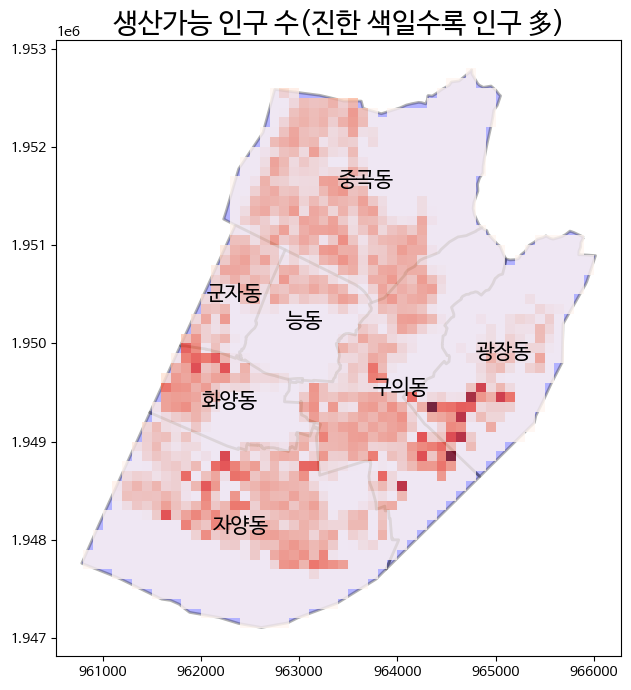

In [ ]:
#예시: 생산가능 인구 수

# 원하는 조회 조건에 맞추어 temp에 입력
temp = population_gj.sort_values(by = '생산가능인구수', ascending = False)

# 강서구 법정동 경계 지도를 ax로(배경으로) 삼아 시각화 
ax = gj_dong.plot(figsize = (8,8), alpha = .3, color = 'blue')
ax.collections[0].set_linewidth(2)
ax.collections[0].set_edgecolor('black')

# 법정동명을 추가
for idx, row in gj_dong.iterrows():

    centroid = row.geometry.centroid
    ax.annotate(row['EMD_KOR_NM'], xy=(centroid.x, centroid.y),
                horizontalalignment='center', verticalalignment='center', fontsize = 15)
    
temp.plot(ax=ax, column = '생산가능인구수', cmap = 'Reds', alpha = .8)
plt.title('생산가능 인구 수(진한 색일수록 인구 多)', fontsize = 20)
plt.show()

인구 없는 공간: 자양동 남부는 뚝섬공원, 능동과 화양동에는 어린이 대공원, 중곡동부터 광장동 북부에는 용마산/아차산, 한강 따라서 강변북로 존재

In [ ]:
##  50~60대 인구수 현황 보기

In [ ]:
population_gj['5060인구수'] = population_gj['50대인구수_남자']
for ages in [	'50대인구수_여자',	'60대인구수_남자',	'60대인구수_여자']:
  population_gj['5060인구수'] += population_gj[ages]

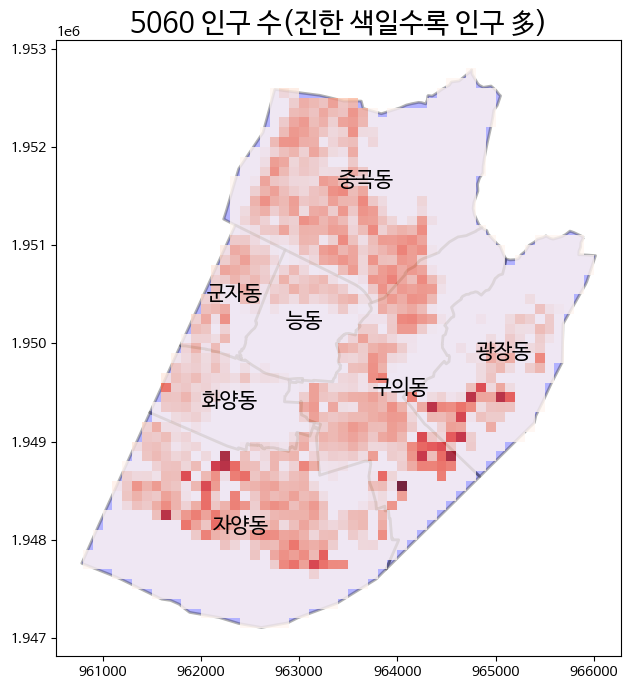

In [ ]:
#5060 인구 수

# 원하는 조회 조건에 맞추어 temp에 입력
temp = population_gj.sort_values(by = '5060인구수', ascending = False)

# 강서구 법정동 경계 지도를 ax로(배경으로) 삼아 시각화 
ax = gj_dong.plot(figsize = (8,8), alpha = .3, color = 'blue')
ax.collections[0].set_linewidth(2)
ax.collections[0].set_edgecolor('black')

# 법정동명을 추가
for idx, row in gj_dong.iterrows():

    centroid = row.geometry.centroid
    ax.annotate(row['EMD_KOR_NM'], xy=(centroid.x, centroid.y),
                horizontalalignment='center', verticalalignment='center', fontsize = 15)
    
temp.plot(ax=ax, column = '5060인구수', cmap = 'Reds', alpha = .8)
plt.title('5060 인구 수(진한 색일수록 인구 多)', fontsize = 20)
plt.show()

### 5060 인구수 분석 결과
화양동의 인구 비중이 감소한 것을 제외하면 대체로 전체 인구 추세를 따라가는 양상이며, 이는 화양동 일대에 건국대학교, 어린이대공원 등 20대부터 40대 사이의 수요가 많은 랜드마크들이 들어서있기 때문으로 추정됨.

## 2.1) (폐기) 상권 위치 정보 

In [ ]:
stores = gpd.read_file('/content/drive/MyDrive/광진구공모전/data/raw/부동산통계정보_공실률/상권구획도/상권구획도(업로드용)/최종_상권328.shp', encoding = 'cp949')


In [ ]:
# # 강서구 법정동 경계 지도를 ax로(배경으로) 삼아 시각화 
# ax = gj_dong.plot(figsize = (8,8), alpha = .3, color = 'blue')
# ax.collections[0].set_linewidth(2)
# ax.collections[0].set_edgecolor('black')

# # 법정동명을 추가
# for idx, row in gj_dong.iterrows():

#     centroid = row.geometry.centroid
#     ax.annotate(row['EMD_KOR_NM'], xy=(centroid.x, centroid.y),
#                 horizontalalignment='center', verticalalignment='center', fontsize = 15)
    
# stores_gj.plot(ax=ax, cmap = 'Reds', alpha = .8)
# plt.title('광진구 주요 상권 위치', fontsize = 20)
# plt.show()

In [ ]:
# seoul_stores = stores[stores['SIDONAME']=='서울']

# stores_gj = gpd.sjoin(seoul_stores, gj_dong[['EMD_KOR_NM', 'geometry']]).drop('index_right', axis=1)

In [ ]:
# population_gj, stores_gj[['CNAME','변경사항','시군명','AREA','소규모','중대형','오피스','집합상권','geometry']]

In [ ]:
# stores_gj.CNAME.unique()

## 2.2) 행정동 별 평균 인구 수 및 공시지가  
==> 사람은 많고 공시지가가 낮은 곳이 어디인가?

In [ ]:
# 공시지가가 0인 경우, 인구가 0인 경우 혹은 결측치를 모두 제외
cond1 = population_gj['공시지가'] > 0
cond2 = population_gj['5060여성인구'] > 0
cond3 = population_gj['1인가구인구수(추산)'] > 0
est_land = population_gj[cond1 & cond2 & cond3]

In [ ]:
# 0 초과 조건만으로 결측치가 제거되었는지 확인
est_land['공시지가'].isna().sum()

0

In [ ]:
est_land['5060인구'].isna().sum()

0

In [ ]:
est_land['1인가구인구수(추산)'].isna().sum()

0

In [ ]:
# 행정동 별 평균 수치들을 가져와서 어떤 행정동을 정책 대상지로 우선 선정할지 결정
lp_dist = est_land.groupby('행정동')['공시지가'].mean().astype('int')
eld_dist =est_land.groupby('행정동')['5060여성인구'].mean() 
young_dist = est_land.groupby('행정동')['1인가구인구수(추산)'].mean()

In [ ]:
dist_means = pd.concat([lp_dist, eld_dist, young_dist], axis=1)
dist_means.columns = [i+'_평균' for i in dist_means.columns]
dist_means.sort_values('공시지가_평균').reset_index(drop = False)

,행정동,공시지가_평균,5060여성인구_평균,1인가구인구수(추산)_평균
0,중곡4동,3426779,67.594595,69.227385
1,중곡3동,3857583,53.673469,86.818976
2,구의2동,4023630,58.418919,57.656155
3,중곡1동,4269613,50.347826,98.906106
4,중곡2동,4488926,66.057692,97.160154
5,능동,4700710,39.594595,100.404158
6,군자동,4753347,46.462963,119.482051
7,광장동,5011988,54.337838,25.294932
8,자양2동,5067731,69.620690,73.400973
9,구의3동,5232056,80.326531,75.414070


In [ ]:
dist_means.sort_values('5060여성인구_평균', ascending = False).reset_index(drop = False)

,행정동,공시지가_평균,5060여성인구_평균,1인가구인구수(추산)_평균
0,자양3동,6613218,83.880000,59.591161
1,구의3동,5232056,80.326531,75.414070
2,자양2동,5067731,69.620690,73.400973
3,중곡4동,3426779,67.594595,69.227385
4,중곡2동,4488926,66.057692,97.160154
5,자양1동,5255255,59.327273,114.819730
6,구의2동,4023630,58.418919,57.656155
7,구의1동,5313679,54.444444,123.259831
8,광장동,5011988,54.337838,25.294932
9,중곡3동,3857583,53.673469,86.818976


In [ ]:
dist_means.sort_values('1인가구인구수(추산)_평균', ascending = False).reset_index(drop = False)

,행정동,공시지가_평균,5060여성인구_평균,1인가구인구수(추산)_평균
0,화양동,5788824,33.561404,260.876909
1,구의1동,5313679,54.444444,123.259831
2,군자동,4753347,46.462963,119.482051
3,자양1동,5255255,59.327273,114.819730
4,자양4동,5708600,50.581818,101.087498
5,능동,4700710,39.594595,100.404158
6,중곡1동,4269613,50.347826,98.906106
7,중곡2동,4488926,66.057692,97.160154
8,중곡3동,3857583,53.673469,86.818976
9,구의3동,5232056,80.326531,75.414070


<Axes: xlabel='공시지가', ylabel='Count'>

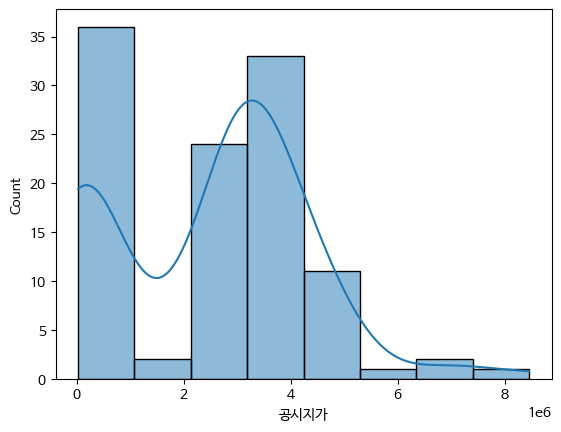

In [ ]:
jk4 = population_gj[(population_gj['공시지가'] > 0) & (population_gj['행정동'] == '중곡4동')]
jk4_lp = jk4['공시지가']
sns.histplot(jk4_lp, kde = True)

<Axes: >

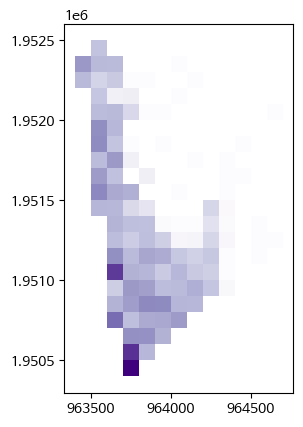

In [ ]:
jk4.plot(column = '공시지가', cmap = 'Purples')

### 평가 가중치 만들기: 
- 2030 1인 세대가 많고, 
- 5060 평균 인구가 많고,
- 땅값이 싼 곳은 어디인가?

1. 각 시리즈에 대해 standard scaling 진행
2. 공시지가는 낮을수록 좋으므로 - 붙임
3. 세 값을 그대로 더해서 weight 생성, 가장 높게 나타나는 몇 곳을 mclp 적용 대상지로 선정

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
dist_means['공시지가_평균']

행정동
광장동     5011988
구의1동    5313679
구의2동    4023630
구의3동    5232056
군자동     4753347
능동      4700710
자양1동    5255255
자양2동    5067731
자양3동    6613218
자양4동    5708600
중곡1동    4269613
중곡2동    4488926
중곡3동    3857583
중곡4동    3426779
화양동     5788824
Name: 공시지가_평균, dtype: int64

In [ ]:
jks = ['중곡2동', '중곡3동', '중곡4동']
population_gj[population_gj['행정동'].isin(jks)]

,20대인구수_남자,geometry_centroid,20대인구수_여자,30대인구수_남자,30대인구수_여자,40대인구수_남자,40대인구수_여자,50대인구수_남자,50대인구수_여자,60대인구수_남자,60대인구수_여자,70대인구수_남자,70대인구수_여자,고령인구수_남자,고령인구수_여자,생산가능인구수_남자,생산가능인구수_여자,총인구수_전체,geometry,법정동,생산가능인구수,행정동,동별(3),1인세대 비율,1인가구인구수(추산),공시지가,5060인구,5060여성인구,2030인구,2030_1인세대(추산),경도,위도,5060인구수
1056,31.0,POINT (963150.000 1952250.000),27.0,44.0,41.0,27.0,28.0,29.0,29.0,29.0,25.0,14.0,16.0,32.0,34.0,148.0,140.0,385.0,"POLYGON ((963100.000 1952200.000, 963100.000 1...",중곡동,288.0,중곡3동,중곡3동,0.273754,105.395108,4987049.41,112.0,54.0,143.0,39.146754,127.082715,37.568881,112.0
1057,19.0,POINT (963050.000 1952450.000),21.0,38.0,35.0,34.0,20.0,32.0,31.0,37.0,41.0,22.0,22.0,41.0,54.0,150.0,131.0,396.0,"POLYGON ((963000.000 1952400.000, 963000.000 1...",중곡동,281.0,중곡3동,중곡3동,0.273754,108.406397,4268903.63,141.0,72.0,113.0,30.934149,127.081573,37.570679,141.0
1058,28.0,POINT (963450.000 1951650.000),32.0,45.0,40.0,23.0,21.0,26.0,34.0,29.0,33.0,14.0,22.0,32.0,46.0,142.0,156.0,405.0,"POLYGON ((963400.000 1951600.000, 963400.000 1...",중곡동,298.0,중곡3동,중곡3동,0.273754,110.870179,3845880.00,122.0,67.0,145.0,39.694262,127.086142,37.563485,122.0
1059,24.0,POINT (963150.000 1952050.000),28.0,51.0,45.0,22.0,24.0,30.0,32.0,29.0,45.0,19.0,24.0,39.0,61.0,145.0,157.0,421.0,"POLYGON ((963100.000 1952000.000, 963100.000 1...",중곡동,302.0,중곡3동,중곡3동,0.273754,115.250235,4016946.49,136.0,77.0,148.0,40.515522,127.082725,37.567078,136.0
1060,21.0,POINT (963150.000 1952450.000),25.0,32.0,25.0,26.0,27.0,29.0,36.0,29.0,27.0,17.0,19.0,38.0,44.0,122.0,129.0,350.0,"POLYGON ((963100.000 1952400.000, 963100.000 1...",중곡동,251.0,중곡3동,중곡3동,0.273754,95.813735,4356692.59,121.0,63.0,103.0,28.196613,127.082705,37.570683,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.0,POINT (964750.000 1951550.000),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((964700.000 1951500.000, 964700.000 1...",중곡동,0.0,중곡4동,중곡4동,0.190334,0.0,NaN,0.0,0.0,0.0,0.0,127.100867,37.562634,0.0
1456,0.0,POINT (964750.000 1952150.000),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((964700.000 1952100.000, 964700.000 1...",중곡동,0.0,중곡4동,중곡4동,0.190334,0.0,NaN,0.0,0.0,0.0,0.0,127.100838,37.568042,0.0
1457,0.0,POINT (964450.000 1951850.000),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((964400.000 1951800.000, 964400.000 1...",중곡동,0.0,중곡4동,중곡4동,0.190334,0.0,48400.02,0.0,0.0,0.0,0.0,127.097455,37.565327,0.0
1458,0.0,POINT (964250.000 1952150.000),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((964200.000 1952100.000, 964200.000 1...",중곡동,0.0,중곡4동,중곡4동,0.190334,0.0,NaN,0.0,0.0,0.0,0.0,127.095176,37.568023,0.0


In [ ]:
price = scaler.fit_transform(dist_means['공시지가_평균'].values.reshape(-1,1))
elder = list(scaler.fit_transform(dist_means['5060여성인구_평균'].values.reshape(-1,1)))
one_hh = list(scaler.fit_transform(dist_means['1인가구인구수(추산)_평균'].values.reshape(-1,1)))

In [ ]:
price = [-i for i in price]

In [ ]:
scaled_ss = [price,elder,one_hh]
scaled_df = pd.concat([pd.Series(i) for i in scaled_ss], axis = 1)
scaled_df.index = dist_means.index
scaled_df.columns = dist_means.columns

In [ ]:
scaled_df['최종가중치'] = scaled_df.sum(axis=1)

In [ ]:
scaled_df.sort_values(by = '최종가중치', ascending = False)

,공시지가_평균,5060여성인구_평균,1인가구인구수(추산)_평균,최종가중치
행정동,,,,
중곡4동,[1.8541604949689128],[0.7253503525321451],[-0.5601019127381924],2.019409
중곡2동,[0.5180896787428223],[0.6105722639493145],[-0.007904587991507216],1.120757
구의3동,[-0.4166908230729288],[1.6761897731762663],[-0.43779857151208496],0.821700
중곡3동,[1.3122537232005373],[-0.3142994389870239],[-0.21233726863227018],0.785617
구의2동,[1.1033838108231604],[0.04009760453035659],[-0.7888512313562162],0.354630
화양동,[-1.1170472485098673],[-1.8162976458440203],[3.2285791384870306],0.295234
중곡1동,[0.793962697184707],[-0.5626632970064666],[0.026610792312779578],0.257910
자양2동,[-0.2099870081806848],[0.8766620659195694],[-0.47759508942374296],0.189080
자양1동,[-0.44587276009824556],[0.10793478244875565],[0.3412040209733026],0.003266


추후 개별 수요지역의 가중치도 이렇게 산정하기로 하자.

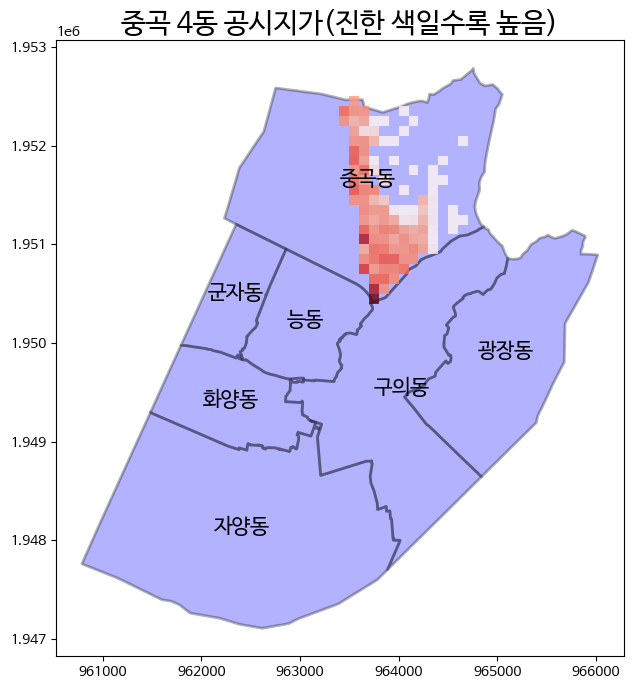

In [ ]:
#중곡동 땅값만 다시 확인

#예시: 생산가능 인구 수

# 원하는 조회 조건에 맞추어 temp에 입력
temp = population_gj[population_gj['행정동']=='중곡4동']

# 강서구 법정동 경계 지도를 ax로(배경으로) 삼아 시각화 
ax = gj_dong.plot(figsize = (8,8), alpha = .3, color = 'blue')
ax.collections[0].set_linewidth(2)
ax.collections[0].set_edgecolor('black')

# 법정동명을 추가
for idx, row in gj_dong.iterrows():

    centroid = row.geometry.centroid
    ax.annotate(row['EMD_KOR_NM'], xy=(centroid.x, centroid.y),
                horizontalalignment='center', verticalalignment='center', fontsize = 15)
    
temp.plot(ax=ax, column = '공시지가', cmap = 'Reds', alpha = .8)
plt.title('중곡 4동 공시지가(진한 색일수록 높음)', fontsize = 20)
plt.show()

/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:807: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  cat = pd.Categorical(values, categories=categories)


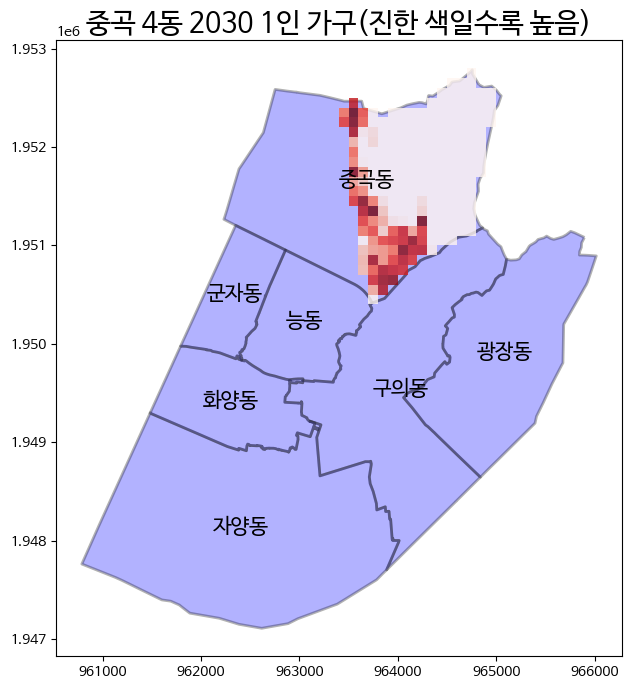

In [ ]:
#중곡동 땅값만 다시 확인

#예시: 생산가능 인구 수

# 원하는 조회 조건에 맞추어 temp에 입력
temp = population_gj[population_gj['행정동']=='중곡4동']

# 강서구 법정동 경계 지도를 ax로(배경으로) 삼아 시각화 
ax = gj_dong.plot(figsize = (8,8), alpha = .3, color = 'blue')
ax.collections[0].set_linewidth(2)
ax.collections[0].set_edgecolor('black')

# 법정동명을 추가
for idx, row in gj_dong.iterrows():

    centroid = row.geometry.centroid
    ax.annotate(row['EMD_KOR_NM'], xy=(centroid.x, centroid.y),
                horizontalalignment='center', verticalalignment='center', fontsize = 15)
    
temp.plot(ax=ax, column = '2030_1인세대(추산)', cmap = 'Reds', alpha = .8)
plt.title('중곡 4동 2030 1인 가구(진한 색일수록 높음)', fontsize = 20)
plt.show()

In [ ]:
# %matplotlib inline
# # 중곡동 데이터만 추출
# temp = population_gj[population_gj['행정동']=='중곡4동']
# fig, ax = plt.subplots(figsize=(8, 8))
# temp.plot(ax=ax, column='공시지가', cmap='Reds', alpha=0.8, legend=True)
# # Leaflet 지도로 변환하여 시각화하기
# mplleaflet.show(fig = fig)

### 보고서용 이미지 만들기

In [ ]:
joonggok_emd = gj_dong[gj_dong['EMD_KOR_NM']== '중곡동']

In [ ]:
population_gj.columns

Index(['20대인구수_남자', 'geometry_centroid', '20대인구수_여자',
       '30대인구수_남자', '30대인구수_여자', '40대인구수_남자',
       '40대인구수_여자', '50대인구수_남자', '50대인구수_여자',
       '60대인구수_남자', '60대인구수_여자', '70대인구수_남자',
       '70대인구수_여자', '고령인구수_남자', '고령인구수_여자',
       '생산가능인구수_남자', '생산가능인구수_여자',
       '총인구수_전체', 'geometry', '법정동', '생산가능인구수', '행정동', '동별(3)',
       '1인세대 비율', '1인가구인구수(추산)', '공시지가', '5060인구', '5060여성인구', '2030인구',
       '2030_1인세대(추산)', '경도', '위도', '5060인구수'],
      dtype='object')

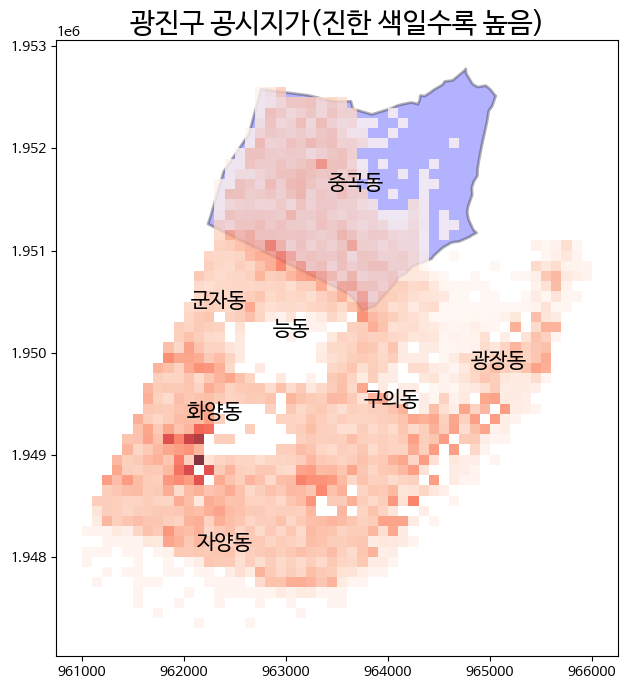

In [ ]:
#광진구 공시지가 확인

#예시: 생산가능 인구 수

# 원하는 조회 조건에 맞추어 temp에 입력
temp = population_gj

# 강서구 법정동 경계 지도를 ax로(배경으로) 삼아 시각화 
ax = joonggok_emd.plot(figsize = (8,8), alpha = .3, color = 'blue')
ax.collections[0].set_linewidth(2)
ax.collections[0].set_edgecolor('black')

# 법정동명을 추가
for idx, row in gj_dong.iterrows():

    centroid = row.geometry.centroid
    ax.annotate(row['EMD_KOR_NM'], xy=(centroid.x, centroid.y),
                horizontalalignment='center', verticalalignment='center', fontsize = 15)
    
temp.plot(ax=ax, column = '공시지가', cmap = 'Reds', alpha = .8)
plt.title('광진구 공시지가(진한 색일수록 높음)', fontsize = 20)
plt.savefig('/content/drive/MyDrive/광진구공모전/code/후보입지png/광진구 공시지가.png', dpi = 300)
plt.show()

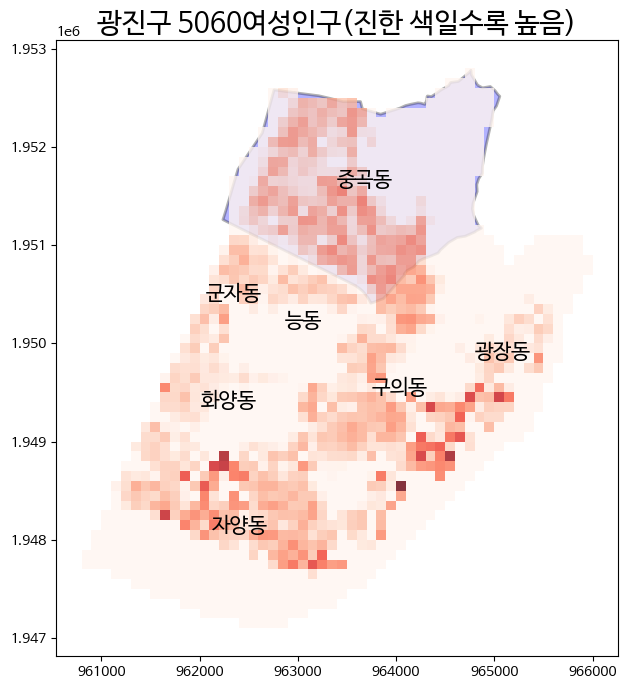

In [ ]:
#광진구 5060여성인구 확인

#예시: 생산가능 인구 수

# 원하는 조회 조건에 맞추어 temp에 입력
temp = population_gj

# 강서구 법정동 경계 지도를 ax로(배경으로) 삼아 시각화 
ax = joonggok_emd.plot(figsize = (8,8), alpha = .3, color = 'blue')
ax.collections[0].set_linewidth(2)
ax.collections[0].set_edgecolor('black')

# 법정동명을 추가
for idx, row in gj_dong.iterrows():

    centroid = row.geometry.centroid
    ax.annotate(row['EMD_KOR_NM'], xy=(centroid.x, centroid.y),
                horizontalalignment='center', verticalalignment='center', fontsize = 15)
    
temp.plot(ax=ax, column = '5060여성인구', cmap = 'Reds', alpha = .8)
plt.title('광진구 5060여성인구(진한 색일수록 높음)', fontsize = 20)
plt.savefig('/content/drive/MyDrive/광진구공모전/code/후보입지png/광진구 5060여성인구.png', dpi = 300)

plt.show()

/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:807: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  cat = pd.Categorical(values, categories=categories)


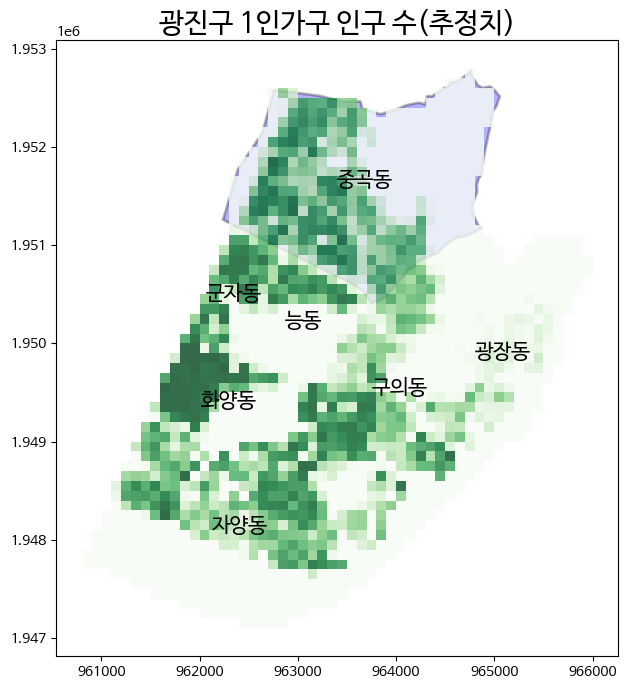

In [ ]:
#광진구 1인가구(추산치) 확인

#예시: 생산가능 인구 수

# 원하는 조회 조건에 맞추어 temp에 입력
temp = population_gj

# 강서구 법정동 경계 지도를 ax로(배경으로) 삼아 시각화 
ax = joonggok_emd.plot(figsize = (8,8), alpha = .3, color = 'blue')
ax.collections[0].set_linewidth(2)
ax.collections[0].set_edgecolor('black')

# 법정동명을 추가
for idx, row in gj_dong.iterrows():

    centroid = row.geometry.centroid
    ax.annotate(row['EMD_KOR_NM'], xy=(centroid.x, centroid.y),
                horizontalalignment='center', verticalalignment='center', fontsize = 15)
    
temp.plot(ax=ax, column = '1인가구인구수(추산)', cmap = 'Greens', alpha = .8)
plt.title('광진구 1인가구 인구 수(추정치)', fontsize = 20)
plt.savefig('/content/drive/MyDrive/광진구공모전/code/후보입지png/광진구 1인가구 인구 수(추산).png', dpi = 300)

plt.show()

In [ ]:
# 캡처용 데이터프레임
df_capture = population_gj[['1인가구인구수(추산)','5060여성인구','공시지가']]
df_capture.head(5)

,1인가구인구수(추산),5060여성인구,공시지가
0,15.186494,0.0,7473608.93
1,32.735331,19.0,4256442.84
2,58.046154,25.0,4241585.83
3,187.637567,77.0,4129310.92
4,30.372987,13.0,4609996.86


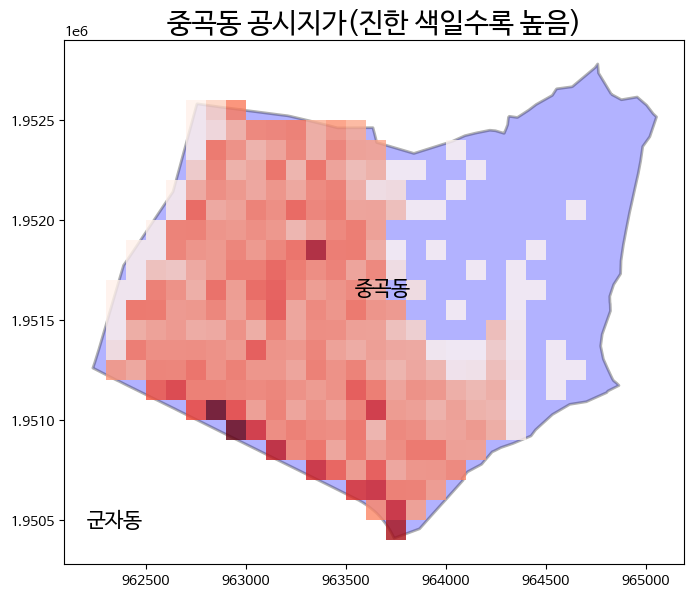

In [ ]:
#중곡동 땅값만 다시 확인

#예시: 생산가능 인구 수

# 원하는 조회 조건에 맞추어 temp에 입력
temp = population_gj[population_gj['법정동']=='중곡동']

# 강서구 법정동 경계 지도를 ax로(배경으로) 삼아 시각화 
ax = joonggok_emd.plot(figsize = (8,8), alpha = .3, color = 'blue')
ax.collections[0].set_linewidth(2)
ax.collections[0].set_edgecolor('black')

# 법정동명을 추가
for idx, row in gj_dong.iterrows():

    centroid = row.geometry.centroid
    ax.annotate(row['EMD_KOR_NM'], xy=(centroid.x, centroid.y),
                horizontalalignment='center', verticalalignment='center', fontsize = 15)
    
temp.plot(ax=ax, column = '공시지가', cmap = 'Reds', alpha = .8)
plt.title('중곡동 공시지가(진한 색일수록 높음)', fontsize = 20)
plt.show()

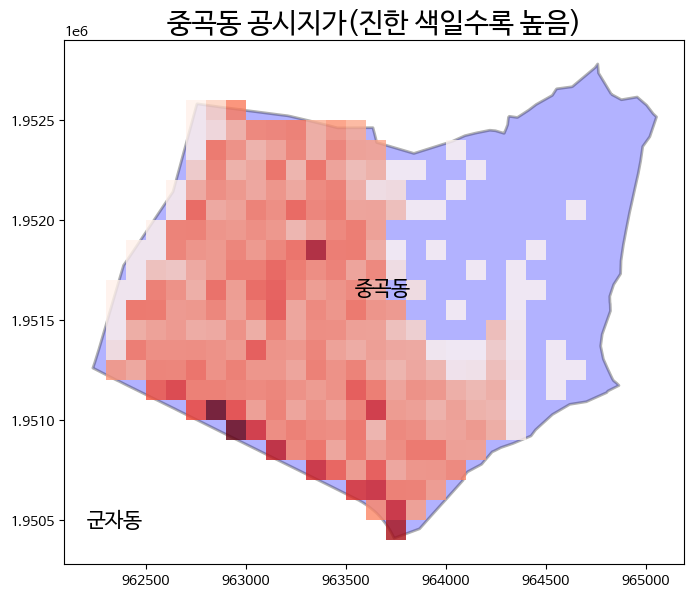

In [ ]:
#중곡동 5060인구수만 다시 확인

#예시: 생산가능 인구 수

# 원하는 조회 조건에 맞추어 temp에 입력
temp = population_gj[population_gj['법정동']=='중곡동']

# 강서구 법정동 경계 지도를 ax로(배경으로) 삼아 시각화 
ax = joonggok_emd.plot(figsize = (8,8), alpha = .3, color = 'blue')
ax.collections[0].set_linewidth(2)
ax.collections[0].set_edgecolor('black')

# 법정동명을 추가
for idx, row in gj_dong.iterrows():

    centroid = row.geometry.centroid
    ax.annotate(row['EMD_KOR_NM'], xy=(centroid.x, centroid.y),
                horizontalalignment='center', verticalalignment='center', fontsize = 15)
    
temp.plot(ax=ax, column = '공시지가', cmap = 'Reds', alpha = .8)
plt.title('중곡동 공시지가(진한 색일수록 높음)', fontsize = 20)
plt.show()

In [ ]:
joonggok_emd

,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,geometry
214,11215101,Junggok-dong,중곡동,"POLYGON ((964825.058 1952633.250, 964875.565 1..."


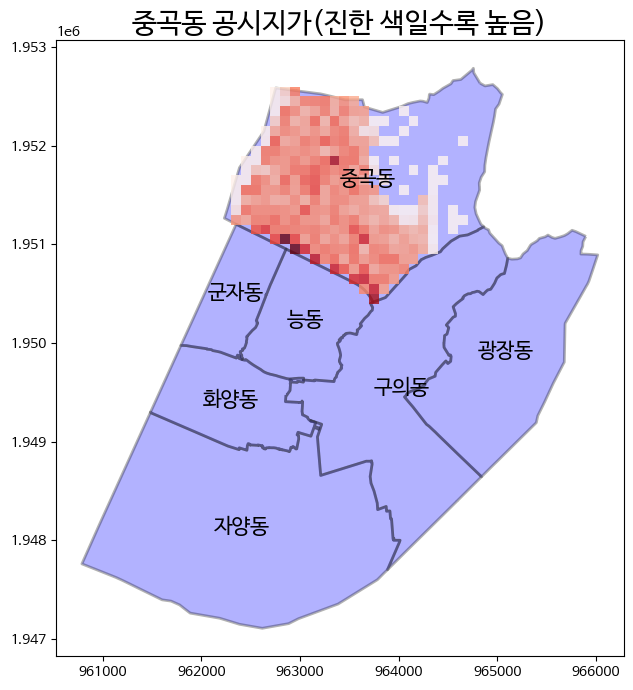

In [ ]:
#중곡동 땅값만 다시 확인

#예시: 생산가능 인구 수

# 원하는 조회 조건에 맞추어 temp에 입력
temp = population_gj[population_gj['법정동']=='중곡동']

# 강서구 법정동 경계 지도를 ax로(배경으로) 삼아 시각화 
ax = gj_dong.plot(figsize = (8,8), alpha = .3, color = 'blue')
ax.collections[0].set_linewidth(2)
ax.collections[0].set_edgecolor('black')

# 법정동명을 추가
for idx, row in gj_dong.iterrows():

    centroid = row.geometry.centroid
    ax.annotate(row['EMD_KOR_NM'], xy=(centroid.x, centroid.y),
                horizontalalignment='center', verticalalignment='center', fontsize = 15)
    
temp.plot(ax=ax, column = '공시지가', cmap = 'Reds', alpha = .8)
plt.title('중곡동 공시지가(진한 색일수록 높음)', fontsize = 20)
plt.show()

## 2.3) 법정동 별 평균 인구 수 및 공시지가

In [ ]:
# 행정동 별 평균 수치들을 가져와서 어떤 행정동을 정책 대상지로 우선 선정할지 결정
lp_dist = est_land.groupby('법정동')['공시지가'].mean().astype('int')
eld_dist =est_land.groupby('법정동')['5060여성인구'].mean() 
young_dist = est_land.groupby('법정동')['1인가구인구수(추산)'].mean()

In [ ]:
ldist_means = pd.concat([lp_dist, eld_dist, young_dist], axis=1)
ldist_means.columns = [i+'_평균' for i in ldist_means.columns]
ldist_means.sort_values('공시지가_평균').reset_index(drop = False)

,법정동,공시지가_평균,5060여성인구_평균,1인가구인구수(추산)_평균
0,중곡동,3947645,60.556561,85.877671
1,군자동,4695790,47.226415,121.402344
2,구의동,4751740,63.271186,82.586869
3,능동,4782371,38.710526,98.227904
4,광장동,5011988,54.337838,25.294932
5,자양동,5636126,65.705069,87.894054
6,화양동,5767672,33.310345,257.046313


In [ ]:
# 가중치 만들기 위해 series들을 스케일링
price = scaler.fit_transform(ldist_means['공시지가_평균'].values.reshape(-1,1))
elder = list(scaler.fit_transform(ldist_means['5060여성인구_평균'].values.reshape(-1,1)))
one_hh = list(scaler.fit_transform(ldist_means['1인가구인구수(추산)_평균'].values.reshape(-1,1)))
price = [-i for i in price]

In [ ]:
scaled_ss = [price,elder,one_hh]
scaled_df = pd.concat([pd.Series(i) for i in scaled_ss], axis = 1)
scaled_df.index = ldist_means.index
scaled_df.columns = ldist_means.columns

scaled_df['최종가중치'] = scaled_df.sum(axis=1)

In [ ]:
scaled_df.sort_values(by = '최종가중치', ascending = False).astype('float')

,공시지가_평균,5060여성인구_평균,1인가구인구수(추산)_평균,최종가중치
법정동,,,,
중곡동,1.742330,0.748411,-0.338148,2.152593
구의동,0.333242,0.982403,-0.387703,0.927942
군자동,0.431289,-0.400607,0.196810,0.227492
자양동,-1.216546,1.192196,-0.307783,-0.332134
화양동,-1.447066,-1.600129,2.239442,-0.807754
능동,0.279565,-1.134650,-0.152168,-1.007254
광장동,-0.122813,0.212376,-1.250449,-1.160887


### 결과 설명
- 최종 가중치는 중곡동이 2.0으로 다른 곳에 비해 적어도 2배 이상의 수치 기록
- 중곡동이 높은 점수를 기록한 까닭은 지대가 저렴하고 5060인구가 많기 때문
- 2030 1인 세대가 높게 책정된 곳은 화양동, 군자동. 각 건국대학교와 세종대학교가 위치해있음
- 공시지가와 노년 인구, 1인가구 비율을 따져보았을 때 
- 이후 인력과 서비스 수요/공급에 따라 차기 대상지 선정 가능


### 최종 결정
후보입지 선정 대상은 중곡동, 이후 지가와 반경 내 주택가 분포 수준을 기준으로 10개 이내의 후보입지를 선정하기로 결정.

In [ ]:
#1. 지가 저렴한 top 10 부터 지도에 찍어보기. 
joonggok = population_gj[population_gj['법정동']=='중곡동']


# 공시지가가 0인 경우, 인구가 0인 경우 혹은 결측치를 모두 제외
cond1 = joonggok['공시지가'] > 0
cond2 = joonggok['5060인구'] > 0
cond3 = joonggok['2030_1인세대(추산)'] > 0
est_joonggok = joonggok[cond1 & cond2 & cond3]

In [ ]:
figpath = '/content/drive/MyDrive/광진구공모전/code/후보입지png'
# os.mkdir(figpath)

In [ ]:
# 5개소씩 구간 별로 나누어보자.
est5s = est_joonggok.sort_values(by = '공시지가').reset_index(drop = True).head(100)

In [ ]:
figpath_sw = '/content/drive/MyDrive/광진구공모전/code/남서부후보입지png'
# os.mkdir(figpath_sw)

## 2.4) 최종 후보입지 정제  
산지와 멀고 타 법정동과 가까운 중곡동 남서부를 대상으로 공시지가가 낮은 곳을 후보입지로써 우선 선정. 이후 수요입지를 얼마나 포함하지는지를 mclp모델을 통해 산출하기로 결정

In [ ]:
# 방위로 4분위를 만들어 3사분위 지역만 후보입지로 포함시키자. 중곡동 남서부가 되겠다.
cond1 = est_joonggok['경도'] <= est_joonggok['경도'].sort_values().median()
cond2 = est_joonggok['위도'] <= est_joonggok['위도'].sort_values().median()
len(est_joonggok[cond1 & cond2])

41

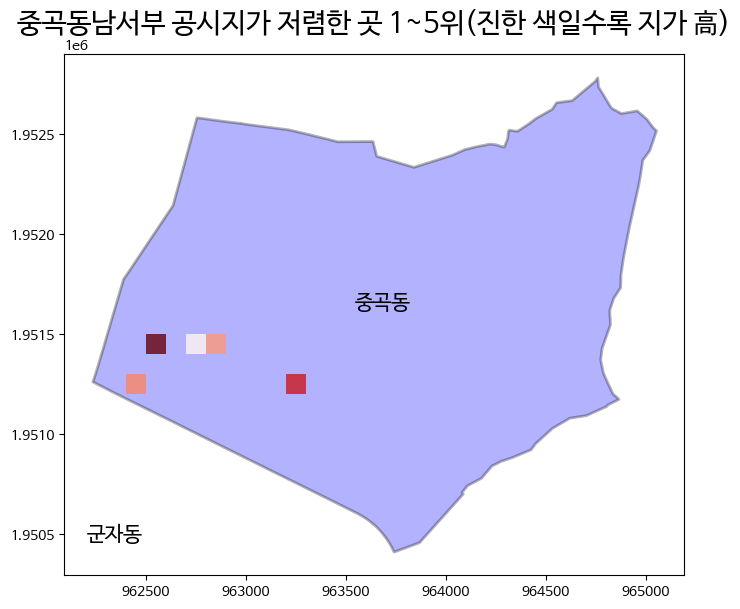

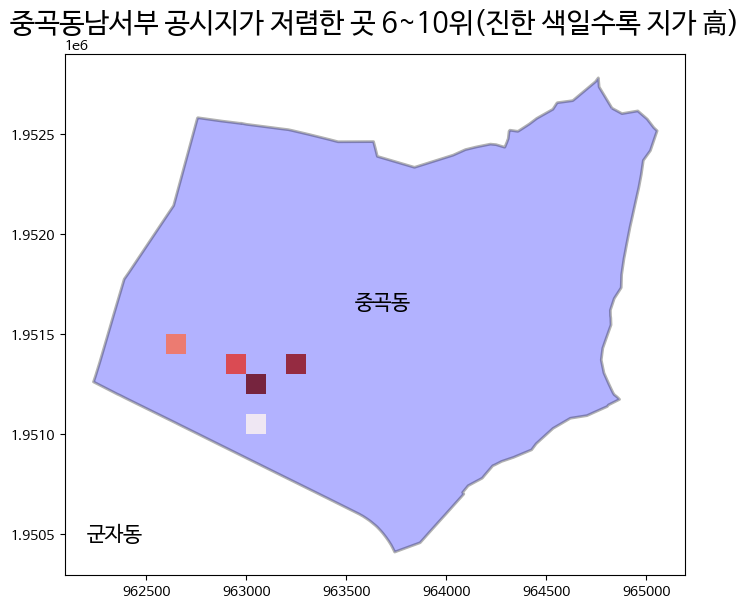

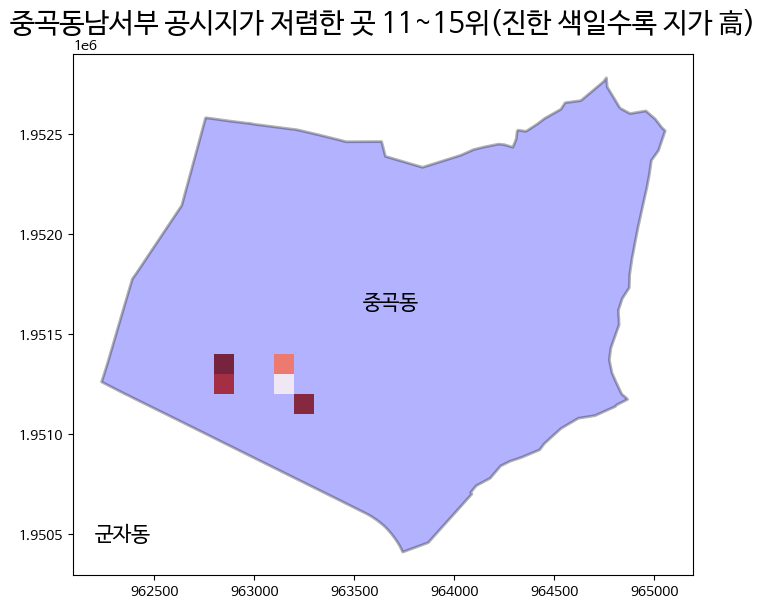

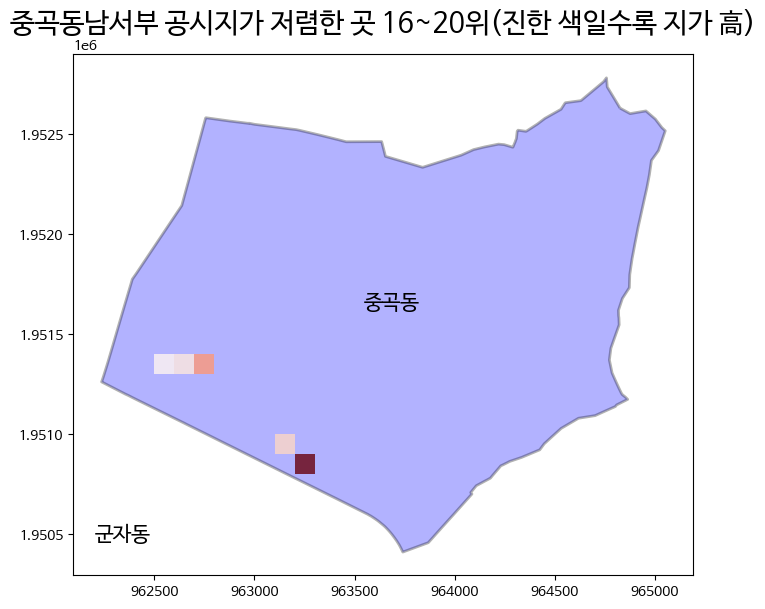

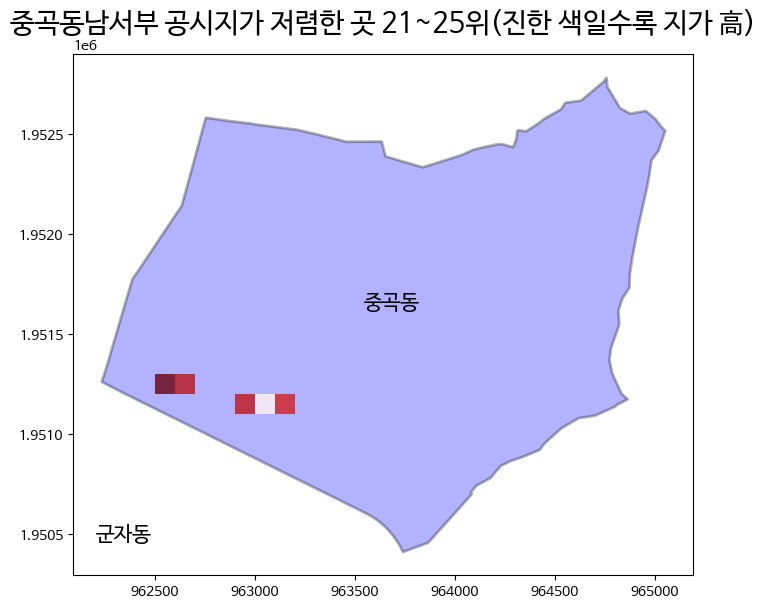

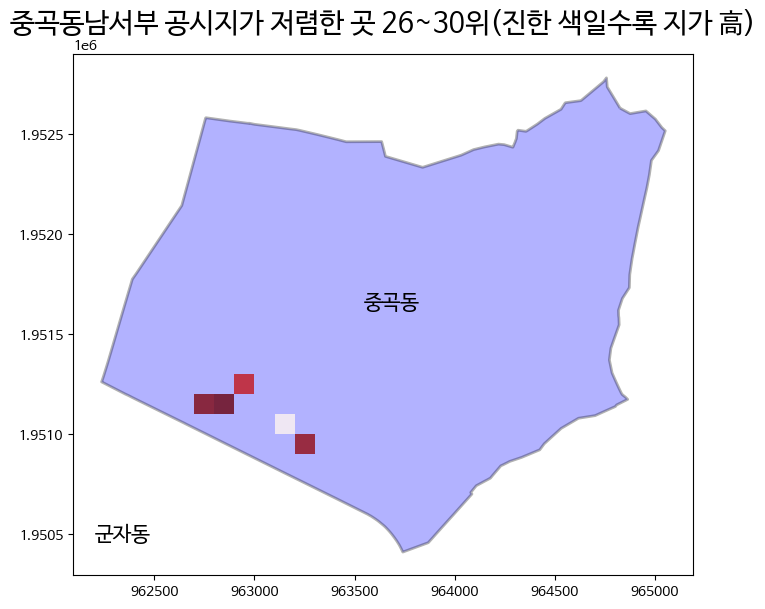

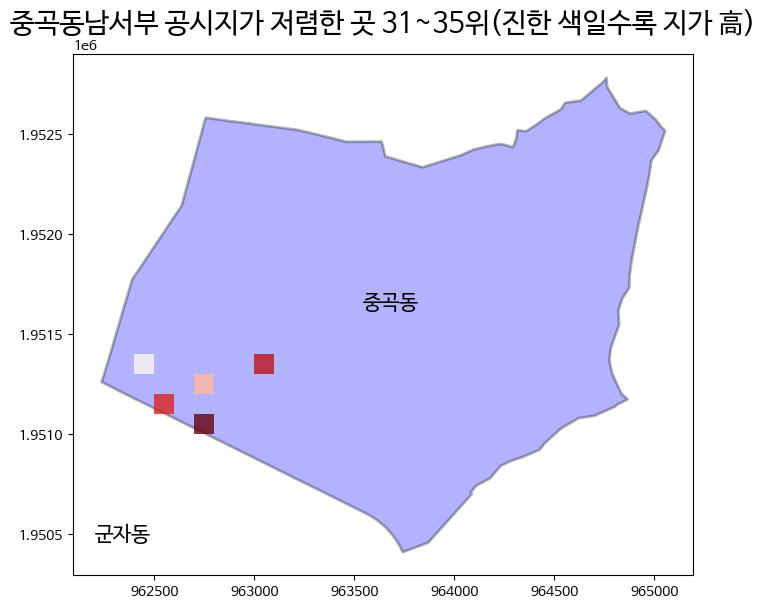

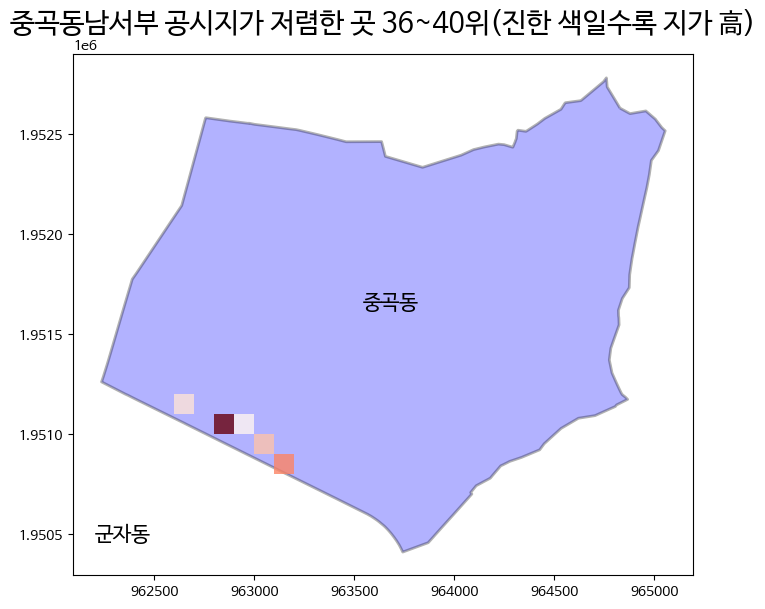

In [ ]:
# 40개이니, 공시지가를 기준으로 5개 구간으로 나누어 파악 
est_sw = est_joonggok[cond1 & cond2].sort_values(by='공시지가')
for i in range(0,40,5):
  temp = est_sw.iloc[i:i+5]

  # 강서구 법정동 경계 지도를 ax로(배경으로) 삼아 시각화 
  ax = joonggok_emd.plot(figsize = (8,8), alpha = .3, color = 'blue')
  ax.collections[0].set_linewidth(2)
  ax.collections[0].set_edgecolor('black')

  # 법정동명을 추가
  for idx, row in gj_dong.iterrows():

      centroid = row.geometry.centroid
      ax.annotate(row['EMD_KOR_NM'], xy=(centroid.x, centroid.y),
                  horizontalalignment='center', verticalalignment='center', fontsize = 15)
      
  temp.plot(ax=ax, column = '공시지가', cmap = 'Reds', alpha = .8)
  plt.title(f'중곡동남서부 공시지가 저렴한 곳 {i+1}~{i+5}위(진한 색일수록 지가 高)', fontsize = 20)
  plt.savefig(figpath_sw+f'/중곡동남서부 공시지가 저렴{i+1}~{i+5}위.png', dpi = 300)
  plt.show()

1~5위로 진행. 
1. 군자동과 인접한데, 군자동의 경우 세종대학교가 입지함으로써 2030 1인 세대가 많은 곳  
2. 외 다른 법정동, 행정동과 인접하여 높은 서비스 수요가 기대됨.

In [ ]:
cwd
candi_path = cwd + '/data/processed/후보입지5개소'
#os.mkdir(candi_path)

In [ ]:
est_sw[:5].to_csv(candi_path+'/후보입지5개소.csv', encoding = 'utf-8', index = False)

#3. 데이터 재정제: 수요입지 생성  
후보입지는 모두 선정하였다. 이후 논의 중 수요입지 선정 과정에 변화가 있어야 한다는 합의점에 도달했으므로 기준을 변경하여 진행한다. 변경점은 다음과 같다.
1. 동대문구와 성동구 일부 법정동을 포함시킬 필요가 있음
2. 서비스 수요를 측정하는 지표로써 2030 1인 세대가 아닌 **1인세대 전체**를 채택
3. 일자리 수요를 측정하는 지표로써 5060인구가 아닌 5060**여성** 인구를 채택

## 3.1) 데이터 불러오기 / 합치기

### 원본데이터 불러오기

In [ ]:
DPATH_population = '/data/raw/100m격자별인구데이터'
dd_population =  '/data/raw/100m격자별인구데이터_동대문구'
sd_population =  '/data/raw/100m격자별인구데이터_성동구'

loadlist_gj = sorted(glob.glob(cwd+DPATH_population+'/*/*.shp'))
loadlist_dd = sorted(glob.glob(cwd+dd_population+'/*/*.shp'))
loadlist_sd = sorted(glob.glob(cwd+sd_population+'/*/*.shp'))

In [ ]:
loadlist_gj[16]

'/content/drive/MyDrive/광진구공모전/data/raw/100m격자별인구데이터/(B100)국토통계_인구정보-총 인구 수(전체)-(격자) 100M_서울특별시 광진구_202210/nlsp_021001001.shp'

In [ ]:
new_loadlist_gj = [loadlist_gj[7],loadlist_gj[9],loadlist_gj[16]]

In [ ]:
# 모든 shp 파일의 인구수가 동일한 컬럼명인 val로 되어있음. 구분의 용이함과 오류 방지를 위해 이를 다른 값으로 대치해줄 텍스트를 추출
# val_names = []

# pattern = re.compile(r'(?<=_인구정보-).+?(?=-\(격자\))')

# for fname in loadlist:
#   valname = pattern.search(fname).group(0)
#   val_names.append(valname)

# 반영하기로 한 데이터셋만 가져오기
val_names =  ['50대 인구 수(여자)', '60대 인구 수(여자)', '총 인구 수(전체)']

In [ ]:
# for a,b in zip(val_names, loadlist):
#   print(a,b) # 추출한 텍스트와 실제 파일 이름 순서가 일치하는지 확인

In [ ]:
#val_names 에서 괄호 빼고, 공란은 언더바로 변경
new_val_names = []
for colname in val_names:
  new_val_names.append(colname.replace('(', '_').replace(')', '').replace(' ', ''))

In [ ]:
new_val_names

['50대인구수_여자', '60대인구수_여자', '총인구수_전체']

In [ ]:
# 경로의 파일 모두 불러오기
gdfs_gj = [gpd.read_file(route, encoding = 'utf-8', crs = 'epsg:5179') for route in new_loadlist_gj]
gdfs_sd = [gpd.read_file(route, encoding = 'utf-8', crs = 'epsg:5179') for route in loadlist_sd]
gdfs_dd = [gpd.read_file(route, encoding = 'utf-8', crs = 'epesg:5179') for route in loadlist_dd]

In [ ]:
# 불러온 파일 확인
gdfs_gj[0].head(3)

,gid,lbl,val,geometry
0,다사628508,N/A,0.0,"POLYGON ((962800.000 1950800.000, 962800.000 1..."
1,다사636494,39.00,39.0,"POLYGON ((963600.000 1949400.000, 963600.000 1..."
2,다사622494,N/A,0.0,"POLYGON ((962200.000 1949400.000, 962200.000 1..."


### 기초 전처리: 컬럼명 변경, 결측치 제거
- 모든 데이터프레임의 인구수 컬럼명이 'val'로 되어있는데, 그대로 merge시 어떤 인구수인지 구분할 수 없으므로 컬럼명 변경 필요
- 어린이 대공원, 한강 인근 영역 등 거주인원 0명인 곳의 값이 결측치가 되어있는데 0으로 바꿔줄 필요 있음.

In [ ]:
gdfs_list = [gdfs_gj, gdfs_dd, gdfs_sd]
for gdfs in gdfs_list:
  for i in range(len(gdfs)):
    gdfs[i].rename({'val':new_val_names[i]}, axis=1, inplace = True)

In [ ]:
gdfs_list[0]

[           gid    lbl  50대인구수_여자  \
 0     다사628508    N/A               0.0   
 1     다사636494  39.00              39.0   
 2     다사622494    N/A               0.0   
 3     다사630485  36.00              36.0   
 4     다사626479  33.00              33.0   
 ...        ...    ...               ...   
 1807  다사636487    NaN               NaN   
 1808  다사644526    NaN               NaN   
 1809  다사624501    NaN               NaN   
 1810  다사613479    NaN               NaN   
 1811  다사630474    NaN               NaN   
 
                                                geometry  
 0     POLYGON ((962800.000 1950800.000, 962800.000 1...  
 1     POLYGON ((963600.000 1949400.000, 963600.000 1...  
 2     POLYGON ((962200.000 1949400.000, 962200.000 1...  
 3     POLYGON ((963000.000 1948500.000, 963000.000 1...  
 4     POLYGON ((962600.000 1947900.000, 962600.000 1...  
 ...                                                 ...  
 1807  POLYGON ((963600.000 1948700.000, 963600.000 1... 

In [ ]:
gdfs_list[0][2]

,gid,lbl,총인구수_전체,geometry
0,다사628508,45.00,45.0,"POLYGON ((962800.000 1950800.000, 962800.000 1..."
1,다사636494,469.00,469.0,"POLYGON ((963600.000 1949400.000, 963600.000 1..."
2,다사622510,N/A,0.0,"POLYGON ((962200.000 1951000.000, 962200.000 1..."
3,다사622494,9.00,9.0,"POLYGON ((962200.000 1949400.000, 962200.000 1..."
4,다사630485,412.00,412.0,"POLYGON ((963000.000 1948500.000, 963000.000 1..."
...,...,...,...,...
1807,다사636487,NaN,NaN,"POLYGON ((963600.000 1948700.000, 963600.000 1..."
1808,다사644526,NaN,NaN,"POLYGON ((964400.000 1952600.000, 964400.000 1..."
1809,다사624501,NaN,NaN,"POLYGON ((962400.000 1950100.000, 962400.000 1..."
1810,다사613479,NaN,NaN,"POLYGON ((961300.000 1947900.000, 961300.000 1..."


In [ ]:
# 광진구에 대해 진행
gdfs_gj = gdfs_list[0]
all_population_gj = gdfs_gj[0][['50대인구수_여자','geometry']] # 첫 geodataframe에 리스트의 첫 요소 넣기

for i in range(len(gdfs_gj))[1:]: # all_population에 다음 요소들을 merge하여 데이터 병합
  all_population_gj = all_population_gj.merge(gdfs_gj[i][[new_val_names[i], 'geometry']], left_on = 'geometry', right_on = 'geometry')

In [ ]:
all_population_gj.isna().sum(axis=0)

50대인구수_여자    859
geometry              0
60대인구수_여자    861
총인구수_전체    826
dtype: int64

In [ ]:
len(all_population_gj)

1812

In [ ]:
# 동대문구에 대해 진행
gdfs_dd = gdfs_list[1]
all_population_dd = gdfs_dd[0][['50대인구수_여자','geometry']] # 첫 geodataframe에 리스트의 첫 요소 넣기

for i in range(len(gdfs_dd))[1:]: # all_population에 다음 요소들을 merge하여 데이터 병합
  all_population_dd = all_population_dd.merge(gdfs_dd[i][[new_val_names[i], 'geometry']], left_on = 'geometry', right_on = 'geometry')

In [ ]:
all_population_dd.isna().sum(axis=0)

50대인구수_여자    462
geometry              0
60대인구수_여자    466
총인구수_전체    390
dtype: int64

In [ ]:
# 성동구에 대해 진행
gdfs_sd = gdfs_list[2]
all_population_sd = gdfs_sd[0][['50대인구수_여자','geometry']] # 첫 geodataframe에 리스트의 첫 요소 넣기

for i in range(len(gdfs_sd))[1:]: # all_population에 다음 요소들을 merge하여 데이터 병합
  all_population_sd = all_population_sd.merge(gdfs_sd[i][[new_val_names[i], 'geometry']], left_on = 'geometry', right_on = 'geometry')

In [ ]:
all_population_sd.isna().sum(axis=0)

50대인구수_여자    933
geometry              0
60대인구수_여자    926
총인구수_전체    832
dtype: int64

In [ ]:
all_population = pd.concat([all_population_gj, all_population_sd, all_population_dd])

all_population.fillna(0, inplace = True)

In [ ]:
all_population = all_population.to_crs('epsg:5179')

## 3.2) 수요 행정동으로 정제
수요 지역은 다음과 같다.
1. 동대문구  ==> 장안 1동 
2. 성동구 ==> 용답동, 송정동
3. 광진구 ==> 군자동, 능동, 구의동, 중곡동  
따라서 타겟이 되는 행정동/법정동만 추려내는 작업을 진행한다.

In [ ]:
# 특정 구역에 포함되는지 판정하기 위해서는 폴리곤 형태보다 특정 점으로 표현되는 것이 낫다. 따라서 임시로 geometry를 centroid로 변경한다
all_population['geometry_origin'] = all_population['geometry']
all_population['geometry'] = all_population['geometry_origin'].centroid

In [ ]:
all_population['5060여성인구'] = all_population['50대인구수_여자'] + all_population['60대인구수_여자']

In [ ]:
all_population.drop(['50대인구수_여자', '60대인구수_여자'], axis = 1, inplace = True)

In [ ]:
all_population = all_population.to_crs('epsg:5179')

### 법정동 정보 불러오기 및 반영

In [ ]:
cond_gj =emd['EMD_CD'].str.startswith('11215')
cond_dd =emd['EMD_CD'].str.startswith('11230')
cond_sd =emd['EMD_CD'].str.startswith('11200')

In [ ]:
emd_demand = emd[cond_gj | cond_sd | cond_dd]

In [ ]:
emd_demand = emd_demand.set_crs('epsg:5179')

In [ ]:
emd_demand

,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,geometry
197,11200101,Sangwangsimni-dong,상왕십리동,"POLYGON ((958126.815 1952155.278, 958126.411 1..."
198,11200102,Hawangsimni-dong,하왕십리동,"POLYGON ((958626.969 1951347.848, 958626.305 1..."
199,11200103,Hongik-dong,홍익동,"POLYGON ((958452.425 1952061.244, 958478.323 1..."
200,11200104,Doseon-dong,도선동,"POLYGON ((959050.408 1951807.611, 959050.049 1..."
201,11200105,Majang-dong,마장동,"POLYGON ((959305.180 1951524.170, 959302.322 1..."
202,11200106,Sageun-dong,사근동,"POLYGON ((959742.154 1951559.814, 959761.453 1..."
203,11200107,Haengdang-dong,행당동,"POLYGON ((958612.816 1950502.649, 958603.203 1..."
204,11200108,Eungbong-dong,응봉동,"POLYGON ((958439.773 1950600.883, 958439.771 1..."
205,11200109,Geumho-dong1(il)-ga,금호동1가,"POLYGON ((958146.158 1949972.656, 958143.732 1..."
206,11200110,Geumho-dong2(i)-ga,금호동2가,"POLYGON ((957313.320 1950351.120, 957312.153 1..."


<Axes: >

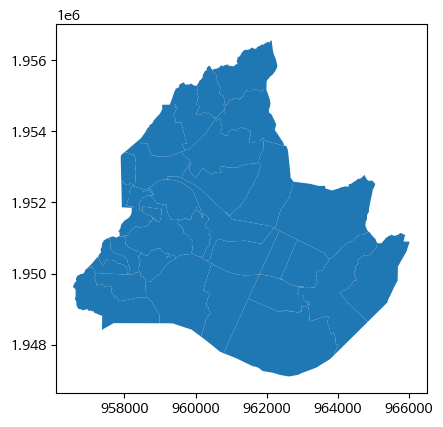

In [ ]:
emd_demand.plot()

In [ ]:
dist_demand = ['장안동', '용답동', '송정동', '군자동', '능동', '구의동', '중곡동'] 
emd_final = emd_demand[emd_demand['EMD_KOR_NM'].isin(dist_demand)]

In [ ]:
emd_final = emd_final.set_crs('epsg:5179')

<Axes: >

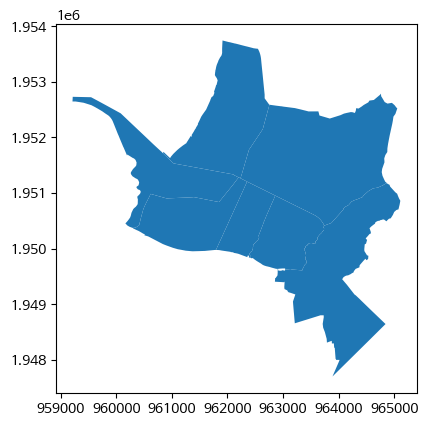

In [ ]:
emd_final.plot()

In [ ]:
demandpoint = gpd.sjoin(all_population, emd_final[['EMD_KOR_NM', 'geometry']], predicate='within').drop('index_right', axis=1)

In [ ]:
demandpoint[demandpoint['EMD_KOR_NM']=='중곡동']

,geometry,총인구수_전체,geometry_origin,5060여성인구,EMD_KOR_NM
5,POINT (963150.000 1952250.000),385.0,"POLYGON ((963100.000 1952200.000, 963100.000 1...",54.0,중곡동
6,POINT (963550.000 1951350.000),271.0,"POLYGON ((963500.000 1951300.000, 963500.000 1...",47.0,중곡동
11,POINT (962550.000 1951350.000),451.0,"POLYGON ((962500.000 1951300.000, 962500.000 1...",57.0,중곡동
14,POINT (963050.000 1952450.000),396.0,"POLYGON ((963000.000 1952400.000, 963000.000 1...",72.0,중곡동
20,POINT (963150.000 1950950.000),273.0,"POLYGON ((963100.000 1950900.000, 963100.000 1...",39.0,중곡동
...,...,...,...,...,...
1249,POINT (962350.000 1951550.000),0.0,"POLYGON ((962300.000 1951500.000, 962300.000 1...",0.0,중곡동
1296,POINT (962350.000 1951650.000),0.0,"POLYGON ((962300.000 1951600.000, 962300.000 1...",0.0,중곡동
1484,POINT (962650.000 1952150.000),0.0,"POLYGON ((962600.000 1952100.000, 962600.000 1...",0.0,중곡동
1498,POINT (962550.000 1951950.000),0.0,"POLYGON ((962500.000 1951900.000, 962500.000 1...",0.0,중곡동


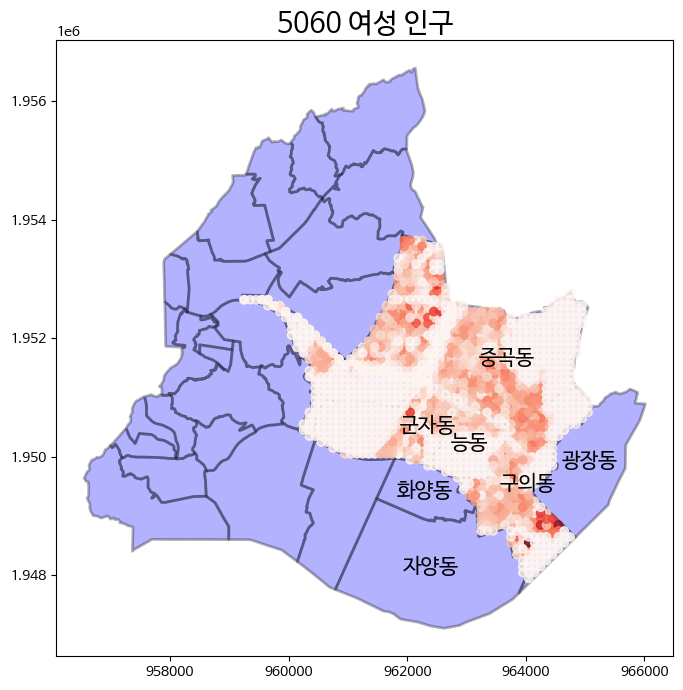

In [ ]:
# 원하는 조회 조건에 맞추어 temp에 입력
temp = demandpoint

# 광진구 법정동 경계 지도를 ax로(배경으로) 삼아 시각화 
ax = emd_demand.plot(figsize = (8,8), alpha = .3, color = 'blue')
ax.collections[0].set_linewidth(2)
ax.collections[0].set_edgecolor('black')

# 법정동명을 추가
for idx, row in gj_dong.iterrows():

    centroid = row.geometry.centroid
    ax.annotate(row['EMD_KOR_NM'], xy=(centroid.x, centroid.y),
                horizontalalignment='center', verticalalignment='center', fontsize = 15)
    
temp.plot(ax=ax, column = '5060여성인구', cmap = 'Reds', alpha = .8)
plt.title('5060 여성 인구', fontsize = 20)
plt.show()

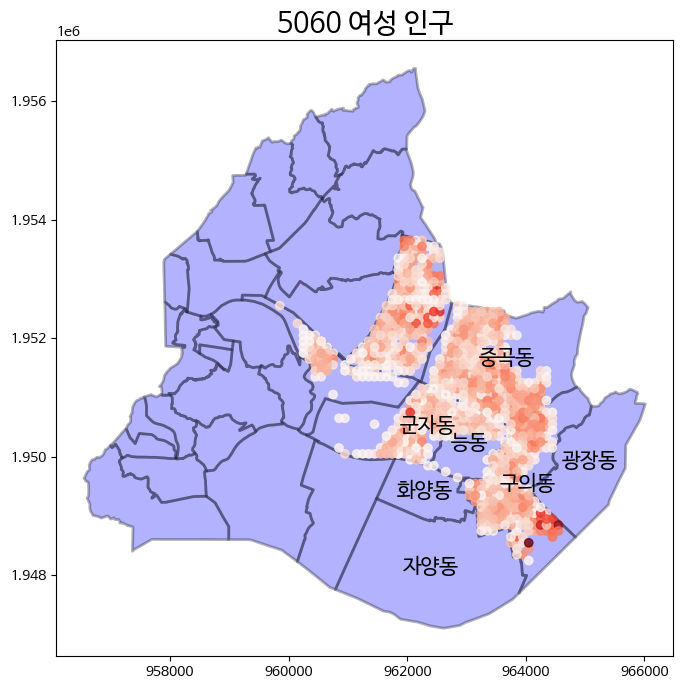

In [ ]:
demandpoint_dropna = demandpoint[demandpoint['총인구수_전체']!=0]


# 원하는 조회 조건에 맞추어 temp에 입력
temp = demandpoint_dropna

# 광진구 법정동 경계 지도를 ax로(배경으로) 삼아 시각화 
ax = emd_demand.plot(figsize = (8,8), alpha = .3, color = 'blue')
ax.collections[0].set_linewidth(2)
ax.collections[0].set_edgecolor('black')

# 법정동명을 추가
for idx, row in gj_dong.iterrows():

    centroid = row.geometry.centroid
    ax.annotate(row['EMD_KOR_NM'], xy=(centroid.x, centroid.y),
                horizontalalignment='center', verticalalignment='center', fontsize = 15)
    
temp.plot(ax=ax, column = '5060여성인구', cmap = 'Reds', alpha = .8, figsize = .2)
plt.title('5060 여성 인구', fontsize = 20)
plt.show()

In [ ]:
demandpoint_dropna

,geometry,총인구수_전체,geometry_origin,5060여성인구,EMD_KOR_NM
0,POINT (962850.000 1950850.000),45.0,"POLYGON ((962800.000 1950800.000, 962800.000 1...",0.0,능동
8,POINT (962750.000 1950350.000),97.0,"POLYGON ((962700.000 1950300.000, 962700.000 1...",19.0,능동
25,POINT (962750.000 1950650.000),172.0,"POLYGON ((962700.000 1950600.000, 962700.000 1...",25.0,능동
27,POINT (962850.000 1950650.000),556.0,"POLYGON ((962800.000 1950600.000, 962800.000 1...",77.0,능동
41,POINT (963650.000 1950250.000),90.0,"POLYGON ((963600.000 1950200.000, 963600.000 1...",13.0,능동
...,...,...,...,...,...
1252,POINT (960750.000 1951050.000),142.0,"POLYGON ((960700.000 1951000.000, 960700.000 1...",0.0,용답동
1404,POINT (960250.000 1952050.000),11.0,"POLYGON ((960200.000 1952000.000, 960200.000 1...",0.0,용답동
1640,POINT (961250.000 1951350.000),18.0,"POLYGON ((961200.000 1951300.000, 961200.000 1...",0.0,용답동
82,POINT (960550.000 1951950.000),135.0,"POLYGON ((960500.000 1951900.000, 960500.000 1...",16.0,용답동


### 행정동 정보 불러오기 및 반영

In [ ]:
dist_gj = admin_district[admin_district['ADM_DR_CD'].str.contains('11050')] #광진구 행정동 코드는 11050

In [ ]:
dist_dd = admin_district[admin_district['ADM_DR_CD'].str.contains('11060')] #동대문구 행정동 코드는 11060

In [ ]:
dist_sd = admin_district[admin_district['ADM_DR_CD'].str.contains('11040')] #성동구 행정동 코드는 11040

In [ ]:
dist_gj.rename({'ADM_DR_NM':'행정동'}, axis = 1, inplace = True)
dist_dd.rename({'ADM_DR_NM':'행정동'}, axis = 1, inplace = True)
dist_sd.rename({'ADM_DR_NM':'행정동'}, axis = 1, inplace = True)

<ipython-input-448-8dce6d18394e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dist_gj.rename({'ADM_DR_NM':'행정동'}, axis = 1, inplace = True)
<ipython-input-448-8dce6d18394e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dist_dd.rename({'ADM_DR_NM':'행정동'}, axis = 1, inplace = True)
<ipython-input-448-8dce6d18394e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dist_sd.rename({'ADM_DR_NM':'행정동'}, axis = 1, inplace = True)


In [ ]:
dist_all = pd.concat([dist_gj,dist_dd,dist_sd])
dist_all = dist_all.to_crs('epsg:5179')

In [ ]:
dist_all

,BASE_DATE,ADM_DR_CD,행정동,OBJECTID,geometry
65,20210630,1105053,화양동,66,"POLYGON ((962057.732 1949937.604, 962066.848 1..."
66,20210630,1105054,군자동,67,"POLYGON ((962836.964 1950902.777, 962825.123 1..."
67,20210630,1105055,중곡1동,68,"POLYGON ((962860.138 1950952.385, 962859.867 1..."
68,20210630,1105056,중곡2동,69,"POLYGON ((963414.268 1951638.407, 963414.455 1..."
69,20210630,1105057,중곡3동,70,"POLYGON ((962966.187 1952556.516, 962969.157 1..."
70,20210630,1105058,중곡4동,71,"POLYGON ((964825.058 1952633.250, 964875.631 1..."
71,20210630,1105059,능동,72,"POLYGON ((963145.882 1950809.933, 963154.412 1..."
72,20210630,1105060,구의1동,73,"POLYGON ((963799.333 1949356.471, 963792.610 1..."
73,20210630,1105061,구의2동,74,"POLYGON ((965105.059 1950854.921, 965104.102 1..."
74,20210630,1105062,구의3동,75,"POLYGON ((964000.456 1949498.656, 964016.382 1..."


In [ ]:
demandpoint_final = gpd.sjoin(demandpoint_dropna, dist_all[['행정동','geometry']], predicate='within').drop('index_right', axis=1)

In [ ]:
demandpoint_final

,geometry,총인구수_전체,geometry_origin,5060여성인구,EMD_KOR_NM,행정동
0,POINT (962850.000 1950850.000),45.0,"POLYGON ((962800.000 1950800.000, 962800.000 1...",0.0,능동,능동
8,POINT (962750.000 1950350.000),97.0,"POLYGON ((962700.000 1950300.000, 962700.000 1...",19.0,능동,능동
25,POINT (962750.000 1950650.000),172.0,"POLYGON ((962700.000 1950600.000, 962700.000 1...",25.0,능동,능동
27,POINT (962850.000 1950650.000),556.0,"POLYGON ((962800.000 1950600.000, 962800.000 1...",77.0,능동,능동
41,POINT (963650.000 1950250.000),90.0,"POLYGON ((963600.000 1950200.000, 963600.000 1...",13.0,능동,능동
...,...,...,...,...,...,...
1021,POINT (962050.000 1953650.000),579.0,"POLYGON ((962000.000 1953600.000, 962000.000 1...",106.0,장안동,장안2동
1063,POINT (962250.000 1953550.000),549.0,"POLYGON ((962200.000 1953500.000, 962200.000 1...",111.0,장안동,장안2동
1066,POINT (961950.000 1953250.000),233.0,"POLYGON ((961900.000 1953200.000, 961900.000 1...",38.0,장안동,장안2동
1239,POINT (962250.000 1953350.000),8.0,"POLYGON ((962200.000 1953300.000, 962200.000 1...",0.0,장안동,장안2동


### 행정/법정동별 전체 인구수 중 1인 세대원 수와 비율 구하기

In [ ]:
household_target = household[household['동별(2)'].isin(['광진구','성동구','동대문구'])]

In [ ]:
household_target.loc[:,'전체세대':].replace('-',0, inplace = True)

<ipython-input-454-aa80732ba8c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  household_target.loc[:,'전체세대':].replace('-',0, inplace = True)


In [ ]:
household_target.loc[:,'전체세대':] = household_target.loc[:,'전체세대':].astype(int)

<ipython-input-455-729c3da379a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  household_target.loc[:,'전체세대':] = household_target.loc[:,'전체세대':].astype(int)


In [ ]:
pops = list(household_target.columns[4:].copy())[:10]
pops

['1인세대',
 '2인세대',
 '3인세대',
 '4인세대',
 '5인세대',
 '6인세대',
 '7인세대',
 '8인세대',
 '9인세대',
 '10인세대 이상']

In [ ]:
for i in range(10):
  household_target[pops[i]+'_인구수'] = household_target.loc[:,pops[i]].copy()*(i+1)

<ipython-input-457-3561fb3bf04f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  household_target[pops[i]+'_인구수'] = household_target.loc[:,pops[i]].copy()*(i+1)
<ipython-input-457-3561fb3bf04f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  household_target[pops[i]+'_인구수'] = household_target.loc[:,pops[i]].copy()*(i+1)
<ipython-input-457-3561fb3bf04f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [ ]:
household_target['인구수_전체'] = household_target.loc[:, '1인세대_인구수':].sum(axis=1)
household_target['1인세대 비율'] = household_target['1인세대_인구수']/household_target['인구수_전체']

<ipython-input-458-55f2f223060e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  household_target['인구수_전체'] = household_target.loc[:, '1인세대_인구수':].sum(axis=1)
<ipython-input-458-55f2f223060e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  household_target['1인세대 비율'] = household_target['1인세대_인구수']/household_target['인구수_전체']


In [ ]:
household_target[['동별(3)','1인세대 비율']]

,동별(3),1인세대 비율
53,소계,0.206983
54,왕십리2동,0.183081
55,마장동,0.238097
56,사근동,0.508555
57,행당1동,0.204958
58,행당2동,0.107087
59,응봉동,0.105403
60,금호1가동,0.147051
61,금호4가동,0.158817
62,성수1가1동,0.204115


### 행정동 별 비율을 격자마다 반영시키기

In [ ]:
demandpoint_final = demandpoint_final.merge(household_target[['동별(3)','1인세대 비율']], left_on = '행정동', right_on = '동별(3)')

In [ ]:
demandpoint_final = demandpoint_final.rename({'1인세대 비율':'1인세대 비율(행정동 기준)'}, axis=1)

In [ ]:
demandpoint_final.columns

Index(['geometry', '총인구수_전체', 'geometry_origin', '5060여성인구',
       'EMD_KOR_NM', '행정동', '동별(3)', '1인세대 비율(행정동 기준)'],
      dtype='object')

In [ ]:
demandpoint_final['1인가구인구수(추산)'] = demandpoint_final['총인구수_전체']*demandpoint_final['1인세대 비율(행정동 기준)']

In [ ]:
demandpoint_final

,geometry,총인구수_전체,geometry_origin,5060여성인구,EMD_KOR_NM,행정동,동별(3),1인세대 비율(행정동 기준),1인가구인구수(추산)
0,POINT (962850.000 1950850.000),45.0,"POLYGON ((962800.000 1950800.000, 962800.000 1...",0.0,능동,능동,능동,0.337478,15.186494
1,POINT (962750.000 1950350.000),97.0,"POLYGON ((962700.000 1950300.000, 962700.000 1...",19.0,능동,능동,능동,0.337478,32.735331
2,POINT (962750.000 1950650.000),172.0,"POLYGON ((962700.000 1950600.000, 962700.000 1...",25.0,능동,능동,능동,0.337478,58.046154
3,POINT (962850.000 1950650.000),556.0,"POLYGON ((962800.000 1950600.000, 962800.000 1...",77.0,능동,능동,능동,0.337478,187.637567
4,POINT (963650.000 1950250.000),90.0,"POLYGON ((963600.000 1950200.000, 963600.000 1...",13.0,능동,능동,능동,0.337478,30.372987
...,...,...,...,...,...,...,...,...,...
840,POINT (962050.000 1953650.000),579.0,"POLYGON ((962000.000 1953600.000, 962000.000 1...",106.0,장안동,장안2동,장안2동,0.160496,92.927471
841,POINT (962250.000 1953550.000),549.0,"POLYGON ((962200.000 1953500.000, 962200.000 1...",111.0,장안동,장안2동,장안2동,0.160496,88.112576
842,POINT (961950.000 1953250.000),233.0,"POLYGON ((961900.000 1953200.000, 961900.000 1...",38.0,장안동,장안2동,장안2동,0.160496,37.395683
843,POINT (962250.000 1953350.000),8.0,"POLYGON ((962200.000 1953300.000, 962200.000 1...",0.0,장안동,장안2동,장안2동,0.160496,1.283972


In [ ]:
elder = list(scaler.fit_transform(demandpoint_final['5060여성인구'].values.reshape(-1,1)))
one_hh = list(scaler.fit_transform(demandpoint_final['1인가구인구수(추산)'].values.reshape(-1,1)))

In [ ]:
weight = []
for i in range(len(elder)):
  weight.append(elder[i]+one_hh[i])

In [ ]:
demandpoint_final['가중치'] = pd.Series(weight).astype(float)

In [ ]:
demandpath = cwd + '/data/processed/수요지역_가중치'
#os.mkdir(demandpath)

In [ ]:
demandpoint_final.to_csv(demandpath+'/수요지역가중치.csv', encoding = 'utf-8', index = False)

### 수요입지 시각화(보고서용)

In [ ]:
demand_poly = demandpoint_final.copy()

In [ ]:
demand_poly.columns

Index(['geometry', '총인구수_전체', 'geometry_origin', '5060여성인구',
       'EMD_KOR_NM', '행정동', '동별(3)', '1인세대 비율(행정동 기준)', '1인가구인구수(추산)', '가중치'],
      dtype='object')

In [ ]:
demand_poly.geometry

0      POINT (962850.000 1950850.000)
1      POINT (962750.000 1950350.000)
2      POINT (962750.000 1950650.000)
3      POINT (962850.000 1950650.000)
4      POINT (963650.000 1950250.000)
                    ...              
840    POINT (962050.000 1953650.000)
841    POINT (962250.000 1953550.000)
842    POINT (961950.000 1953250.000)
843    POINT (962250.000 1953350.000)
844    POINT (962450.000 1952650.000)
Name: geometry, Length: 845, dtype: geometry

In [ ]:
demand_poly.geometry = demand_poly['geometry_origin']

In [ ]:
demand_poly['EMD_KOR_NM'].unique()

array(['능동', '군자동', '구의동', '중곡동', '송정동', '용답동', '장안동'], dtype=object)

In [ ]:
demand_poly.rename({'EMD_KOR_NM':'법정동'}, axis=1, inplace = True)

In [ ]:
demand_poly[['5060여성인구','1인가구인구수(추산)', '가중치', '법정동', '행정동', 'geometry']]

,5060여성인구,1인가구인구수(추산),가중치,법정동,행정동,geometry
0,0.0,15.186494,-2.598426,능동,능동,"POLYGON ((962800.000 1950800.000, 962800.000 1..."
1,19.0,32.735331,-1.743612,능동,능동,"POLYGON ((962700.000 1950300.000, 962700.000 1..."
2,25.0,58.046154,-1.091403,능동,능동,"POLYGON ((962700.000 1950600.000, 962700.000 1..."
3,77.0,187.637567,2.825241,능동,능동,"POLYGON ((962800.000 1950600.000, 962800.000 1..."
4,13.0,30.372987,-1.952074,능동,능동,"POLYGON ((963600.000 1950200.000, 963600.000 1..."
...,...,...,...,...,...,...
840,106.0,92.927471,1.780651,장안동,장안2동,"POLYGON ((962000.000 1953600.000, 962000.000 1..."
841,111.0,88.112576,1.823200,장안동,장안2동,"POLYGON ((962200.000 1953500.000, 962200.000 1..."
842,38.0,37.395683,-1.138018,장안동,장안2동,"POLYGON ((961900.000 1953200.000, 961900.000 1..."
843,0.0,1.283972,-2.867254,장안동,장안2동,"POLYGON ((962200.000 1953300.000, 962200.000 1..."


#### 시각화

In [ ]:
#os.mkdir('/content/drive/MyDrive/광진구공모전/code/수요입지EDA')
savepath = '/content/drive/MyDrive/광진구공모전/code/수요입지EDA' # 필요시 경로는 변경

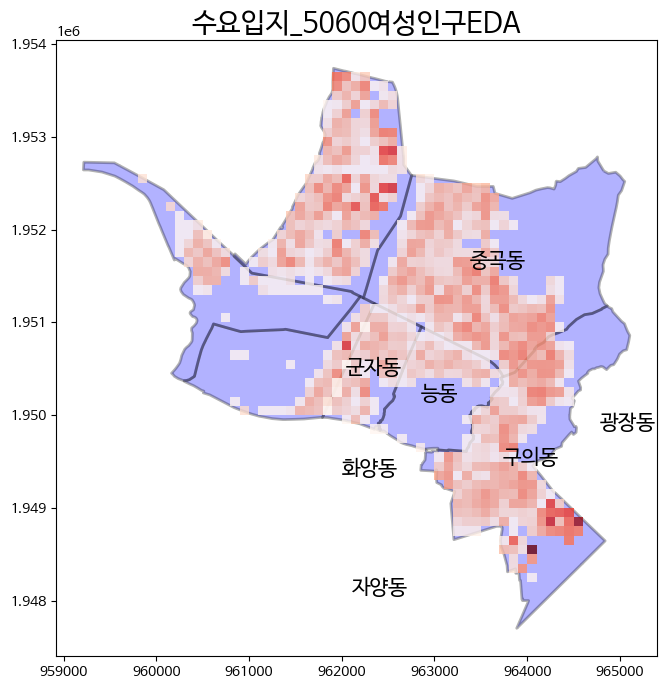

In [ ]:
# 원하는 조회 조건에 맞추어 temp에 입력
temp = demand_poly
# 광진구 법정동 경계 지도를 ax로(배경으로) 삼아 시각화 
ax = emd_final.plot(figsize = (8,8), alpha = .3, color = 'blue')
ax.collections[0].set_linewidth(2)
ax.collections[0].set_edgecolor('black')

# 법정동명을 추가
for idx, row in gj_dong.iterrows():

    centroid = row.geometry.centroid
    ax.annotate(row['EMD_KOR_NM'], xy=(centroid.x, centroid.y),
                horizontalalignment='center', verticalalignment='center', fontsize = 15)
    
temp.plot(ax=ax, column = '5060여성인구', cmap = 'Reds', alpha = .8)
plt.title('수요입지_5060여성인구EDA', fontsize = 20)
plt.savefig(savepath+'/수요입지_5060여성인구.png', dpi = 300)
plt.show()

/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:807: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  cat = pd.Categorical(values, categories=categories)


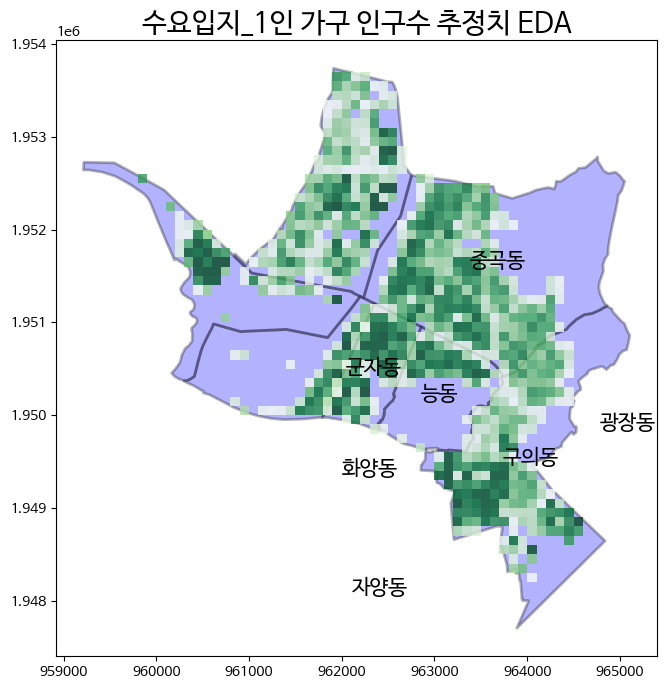

In [ ]:
# 원하는 조회 조건에 맞추어 temp에 입력
temp = demand_poly
# 광진구 법정동 경계 지도를 ax로(배경으로) 삼아 시각화 
ax = emd_final.plot(figsize = (8,8), alpha = .3, color = 'blue')
ax.collections[0].set_linewidth(2)
ax.collections[0].set_edgecolor('black')

# 법정동명을 추가
for idx, row in gj_dong.iterrows():

    centroid = row.geometry.centroid
    ax.annotate(row['EMD_KOR_NM'], xy=(centroid.x, centroid.y),
                horizontalalignment='center', verticalalignment='center', fontsize = 15)
    
temp.plot(ax=ax, column = '1인가구인구수(추산)', cmap = 'Greens', alpha = .8)
plt.title('수요입지_1인 가구 인구수 추정치 EDA', fontsize = 20)
plt.savefig(savepath+'/수요입지_1인가구인구.png', dpi = 300)
plt.show()

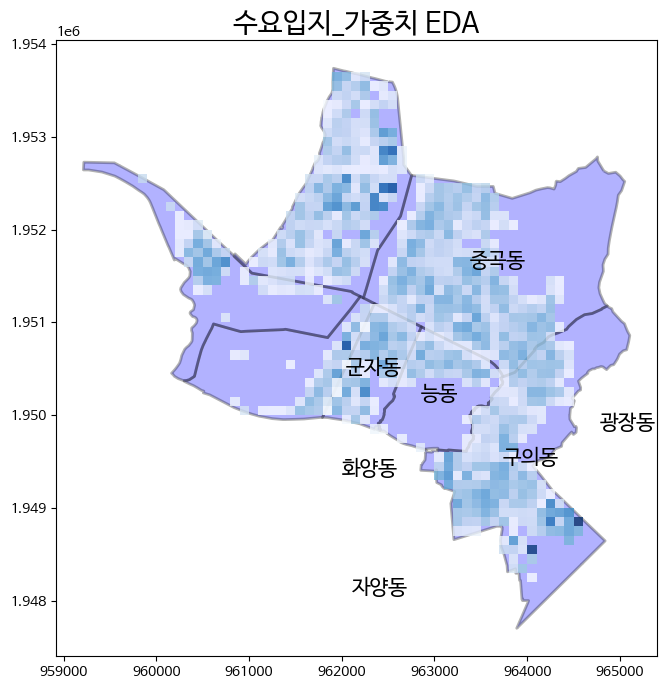

In [ ]:
# 원하는 조회 조건에 맞추어 temp에 입력
temp = demand_poly
# 광진구 법정동 경계 지도를 ax로(배경으로) 삼아 시각화 
ax = emd_final.plot(figsize = (8,8), alpha = .3, color = 'blue')
ax.collections[0].set_linewidth(2)
ax.collections[0].set_edgecolor('black')

# 법정동명을 추가
for idx, row in gj_dong.iterrows():

    centroid = row.geometry.centroid
    ax.annotate(row['EMD_KOR_NM'], xy=(centroid.x, centroid.y),
                horizontalalignment='center', verticalalignment='center', fontsize = 15)
    
temp.plot(ax=ax, column = '가중치', cmap = 'Blues', alpha = .8)
plt.title('수요입지_가중치 EDA', fontsize = 20)
plt.savefig(savepath+'/가중치.png', dpi = 300)
plt.show()